# Retail Customer Analysis

Link DataSet: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II#

Đây là tập dữ liệu giao dịch chứa tất cả các giao dịch xảy ra từ năm 2009 đến năm 2011 đối với hoạt động bán lẻ trực tuyến không có cửa hàng có trụ sở tại Vương quốc Anh và đã đăng ký.

Công ty chủ yếu bán quà tặng độc đáo cho mọi dịp. Nhiều khách hàng của công ty là người bán buôn.

Thông tin thuộc tính:

1) Invoice: Số hóa đơn. Danh nghĩa, một số nguyên gồm 6 chữ số được gán duy nhất cho mỗi giao dịch. Nếu mã này bắt đầu bằng chữ cái 'c' thì nó biểu thị việc hủy.

2) StockCode: Mã sản phẩm (mặt hàng). Danh nghĩa, một số nguyên gồm 5 chữ số được gán duy nhất cho từng sản phẩm riêng biệt.

3) Description: Tên sản phẩm (mặt hàng). Trên danh nghĩa.

4) Quantity: Số lượng của từng sản phẩm (mặt hàng) trên một giao dịch. Số.

5) InvoiceDate: Ngày và giờ lập hóa đơn. Số, ngày và giờ mỗi giao dịch được tạo.

6) Price: Đơn giá. Số, Giá sản phẩm trên mỗi đơn vị bằng đồng bảng Anh.

7) CustomerID: Mã số khách hàng. Danh nghĩa, một số nguyên gồm 5 chữ số được gán duy nhất cho mỗi khách hàng.

8) Country: Tên quốc gia. Danh nghĩa, tên quốc gia nơi mỗi khách hàng cư trú.

### Import 1 số thư viện

In [295]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import plotly.express as px
import xlrd
import warnings
from scipy.stats import zscore
warnings.filterwarnings("ignore")
import datetime
np.random.seed(42)
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import lifetimes
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
from sklearn.metrics import mean_squared_error, r2_score
import math
from math import sqrt
from sklearn.linear_model import LinearRegression
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
from lifetimes.utils import summary_data_from_transaction_data
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
import plotly.graph_objects as go

In [150]:
plt.style.use("ggplot")

### Đọc, tiền xử lý dữ liệu

In [151]:
df = pd.read_excel("online_retail_II.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"])

In [152]:
df1 = df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

In [153]:
df1.shape, df2.shape

((525461, 8), (541910, 8))

In [154]:
sum([df1.shape[0], df2.shape[0]])

1067371

In [155]:
data = pd.concat([df1, df2])


In [156]:
data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


#### Làm sạch dữ liệu

#### Loại bỏ các cột null

In [157]:
data.isnull().sum()/data.shape[0]*100

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

In [158]:
data.dropna(axis = 0, subset = ["Description"], inplace = True)
data.isnull().sum() 

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    238625
Country             0
dtype: int64

In [159]:
data["Customer ID"].isnull().sum()

238625

In [160]:
data.dropna(axis = 0, subset = ["Customer ID"], inplace = True)

In [161]:
data.isnull().sum() 


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [162]:
data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Loại bỏ các giao dịch bị hủy: Các giao dịch có Invoice bắt đầu bằng 'c' là các giao dịch bị hủy và không nên được đưa vào phân tích.

In [163]:
data = data[~data['Invoice'].astype(str).str.startswith('c')]

Xử lý các giá trị không hợp lệ trong Quantity và Price:
- Loại bỏ các dòng có Quantity nhỏ hơn hoặc bằng 0.
- Loại bỏ các dòng có Price nhỏ hơn hoặc bằng 0.

In [164]:
data = data[(data['Quantity'] > 0) & (data['Price'] > 0)]

Chuẩn hóa định dạng InvoiceDate: Chuyển đổi cột InvoiceDate sang đúng kiểu datetime.


In [165]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

Tạo cột Total Amount: Tính toán tổng giá trị của mỗi giao dịch bằng cách nhân Quantity với UnitPrice

In [166]:
data['Total Amount'] = data['Quantity'] * data['Price']

Rời rạc hóa thời gian: Tạo các cột mới cho năm, tháng, ngày và giờ từ cột InvoiceDate để hỗ trợ phân tích theo thời gian.

In [167]:
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Hour'] = data['InvoiceDate'].dt.hour

In [168]:
data.shape

(805549, 13)

In [169]:
# Đảm bảo rằng tất cả các giá trị trong 'StockCode' là chuỗi
label_encoder_stockcode = LabelEncoder()
data['StockCode'] = data['StockCode'].astype(str)
data['StockCode'] = label_encoder_stockcode.fit_transform(data['StockCode'])

In [170]:
data_copy = data.copy()
data_copy.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Amount,Year,Month,Day,Hour
0,489434,4009,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,1,7
1,489434,3326,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,7
2,489434,3328,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,7
3,489434,1253,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12,1,7
4,489434,618,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12,1,7


               Invoice  StockCode  Quantity      Year     Month       Day  \
Invoice       1.000000   0.056141 -0.004746  0.875014  0.356730  0.028943   
StockCode     0.056141   1.000000 -0.001420  0.051419  0.016664  0.000416   
Quantity     -0.004746  -0.001420  1.000000 -0.001165 -0.007047 -0.000943   
Year          0.875014   0.051419 -0.001165  1.000000 -0.136044  0.065207   
Month         0.356730   0.016664 -0.007047 -0.136044  1.000000 -0.140031   
Day           0.028943   0.000416 -0.000943  0.065207 -0.140031  1.000000   
Price        -0.004715   0.030809 -0.004909 -0.002522 -0.004839  0.001852   
Customer ID  -0.013077   0.007904 -0.008893 -0.031841  0.032738 -0.003141   
Country      -0.024187   0.014788 -0.024110 -0.034670  0.015587  0.000048   
Total Amount -0.000312   0.011633  0.826590  0.001386 -0.003099 -0.002088   

                 Price  Customer ID   Country  Total Amount  
Invoice      -0.004715    -0.013077 -0.024187     -0.000312  
StockCode     0.030809     0

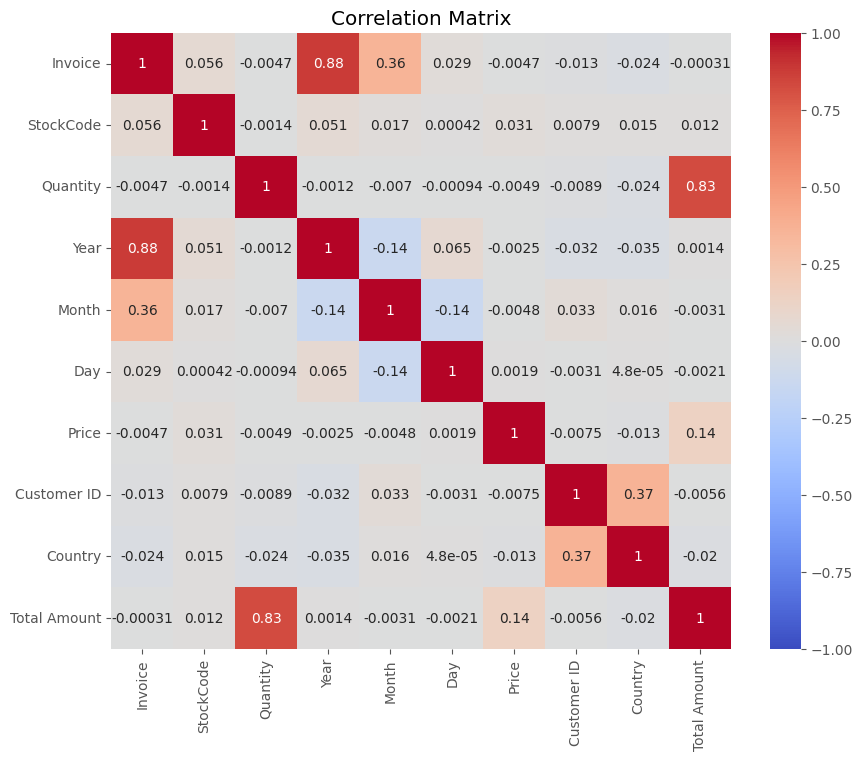

In [171]:
#Chuẩn hóa cột 'Country' và 'StockCode' thành dạng số
data_copy2 = data_copy.copy()
label_encoder_country = LabelEncoder()
data_copy2['Country'] = label_encoder_country.fit_transform(data_copy['Country'])
data_copy2['StockCode'] = label_encoder_stockcode.fit_transform(data_copy['StockCode'])

# Lựa chọn các cột số để tính toán ma trận tương quan
numeric_data = data_copy2[['Invoice', 'StockCode', 'Quantity', 'Year', 'Month', 'Day', 'Price', 'Customer ID', 'Country', 'Total Amount']]

# Tính toán ma trận tương quan
correlation_matrix = numeric_data.corr()

# Hiển thị ma trận tương quan
print(correlation_matrix)

# Trực quan hóa ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# EDA

Đếm số lượng sản phẩm bán được theo mỗi quốc gia


In [172]:
temp_df = pd.DataFrame(data["Country"].value_counts())

In [173]:
temp_df.head(10)

,count
Country,
United Kingdom,725250
Germany,16694
EIRE,15743
France,13812
Netherlands,5088
Spain,3719
Belgium,3068
Switzerland,3011
Portugal,2446


In [174]:
names  = temp_df.index

In [175]:
px.scatter(temp_df, y='count', color=names, title="Count of Countries")


Như bạn có thể thấy **United Kingdom** có số lượt giao dịch tối đa so với các quốc gia khác. Điều cần lưu ý ở đây là **United Kingdom** là tầng lớp thống trị trong dữ liệu này, điều này khiến dữ liệu của chúng tôi có vẻ mất cân bằng giữa tầng lớp chính và tầng lớp thiểu số.

Bạn có thể kiểm tra chéo tương tự sau khi bỏ chọn **United Kingdom** từ biểu đồ trên và xem trục của bạn biến đổi như thế nào.

In [176]:
# Chuyển đổi kiểu dữ liệu của cột "Quantity" thành số nguyên
data['Quantity'] = data['Quantity'].astype(int)

# Thực hiện phép nhóm theo quốc gia và tính tổng của cột "Quantity", sau đó sắp xếp giảm dần và lấy 10 giá trị đầu tiên
data.groupby("Country")["Quantity"].sum().sort_values(ascending=False).head(10)


Country
United Kingdom    8705313
Netherlands        383977
EIRE               321703
France             273674
Denmark            237925
Germany            227983
Australia          104090
Sweden              88512
Switzerland         52337
Spain               50796
Name: Quantity, dtype: int32

In [177]:
px.scatter(data.iloc[:, [5, 7]].groupby(["Country"]).mean(), 
           y="Price", size="Price", title="Average Price by Country", opacity=0.48)

Từ biểu đồ dấu chấm ở trên, chúng ta có thể kết luận rằng ** Singapore** có giá trung bình cao nhất, tiếp theo là **Norway** và **Malta**. Hãy đi sâu hơn và xem phân phối để hiểu rõ hơn về dữ liệu của chúng tôi.

In [178]:
countries = data["Country"].unique()

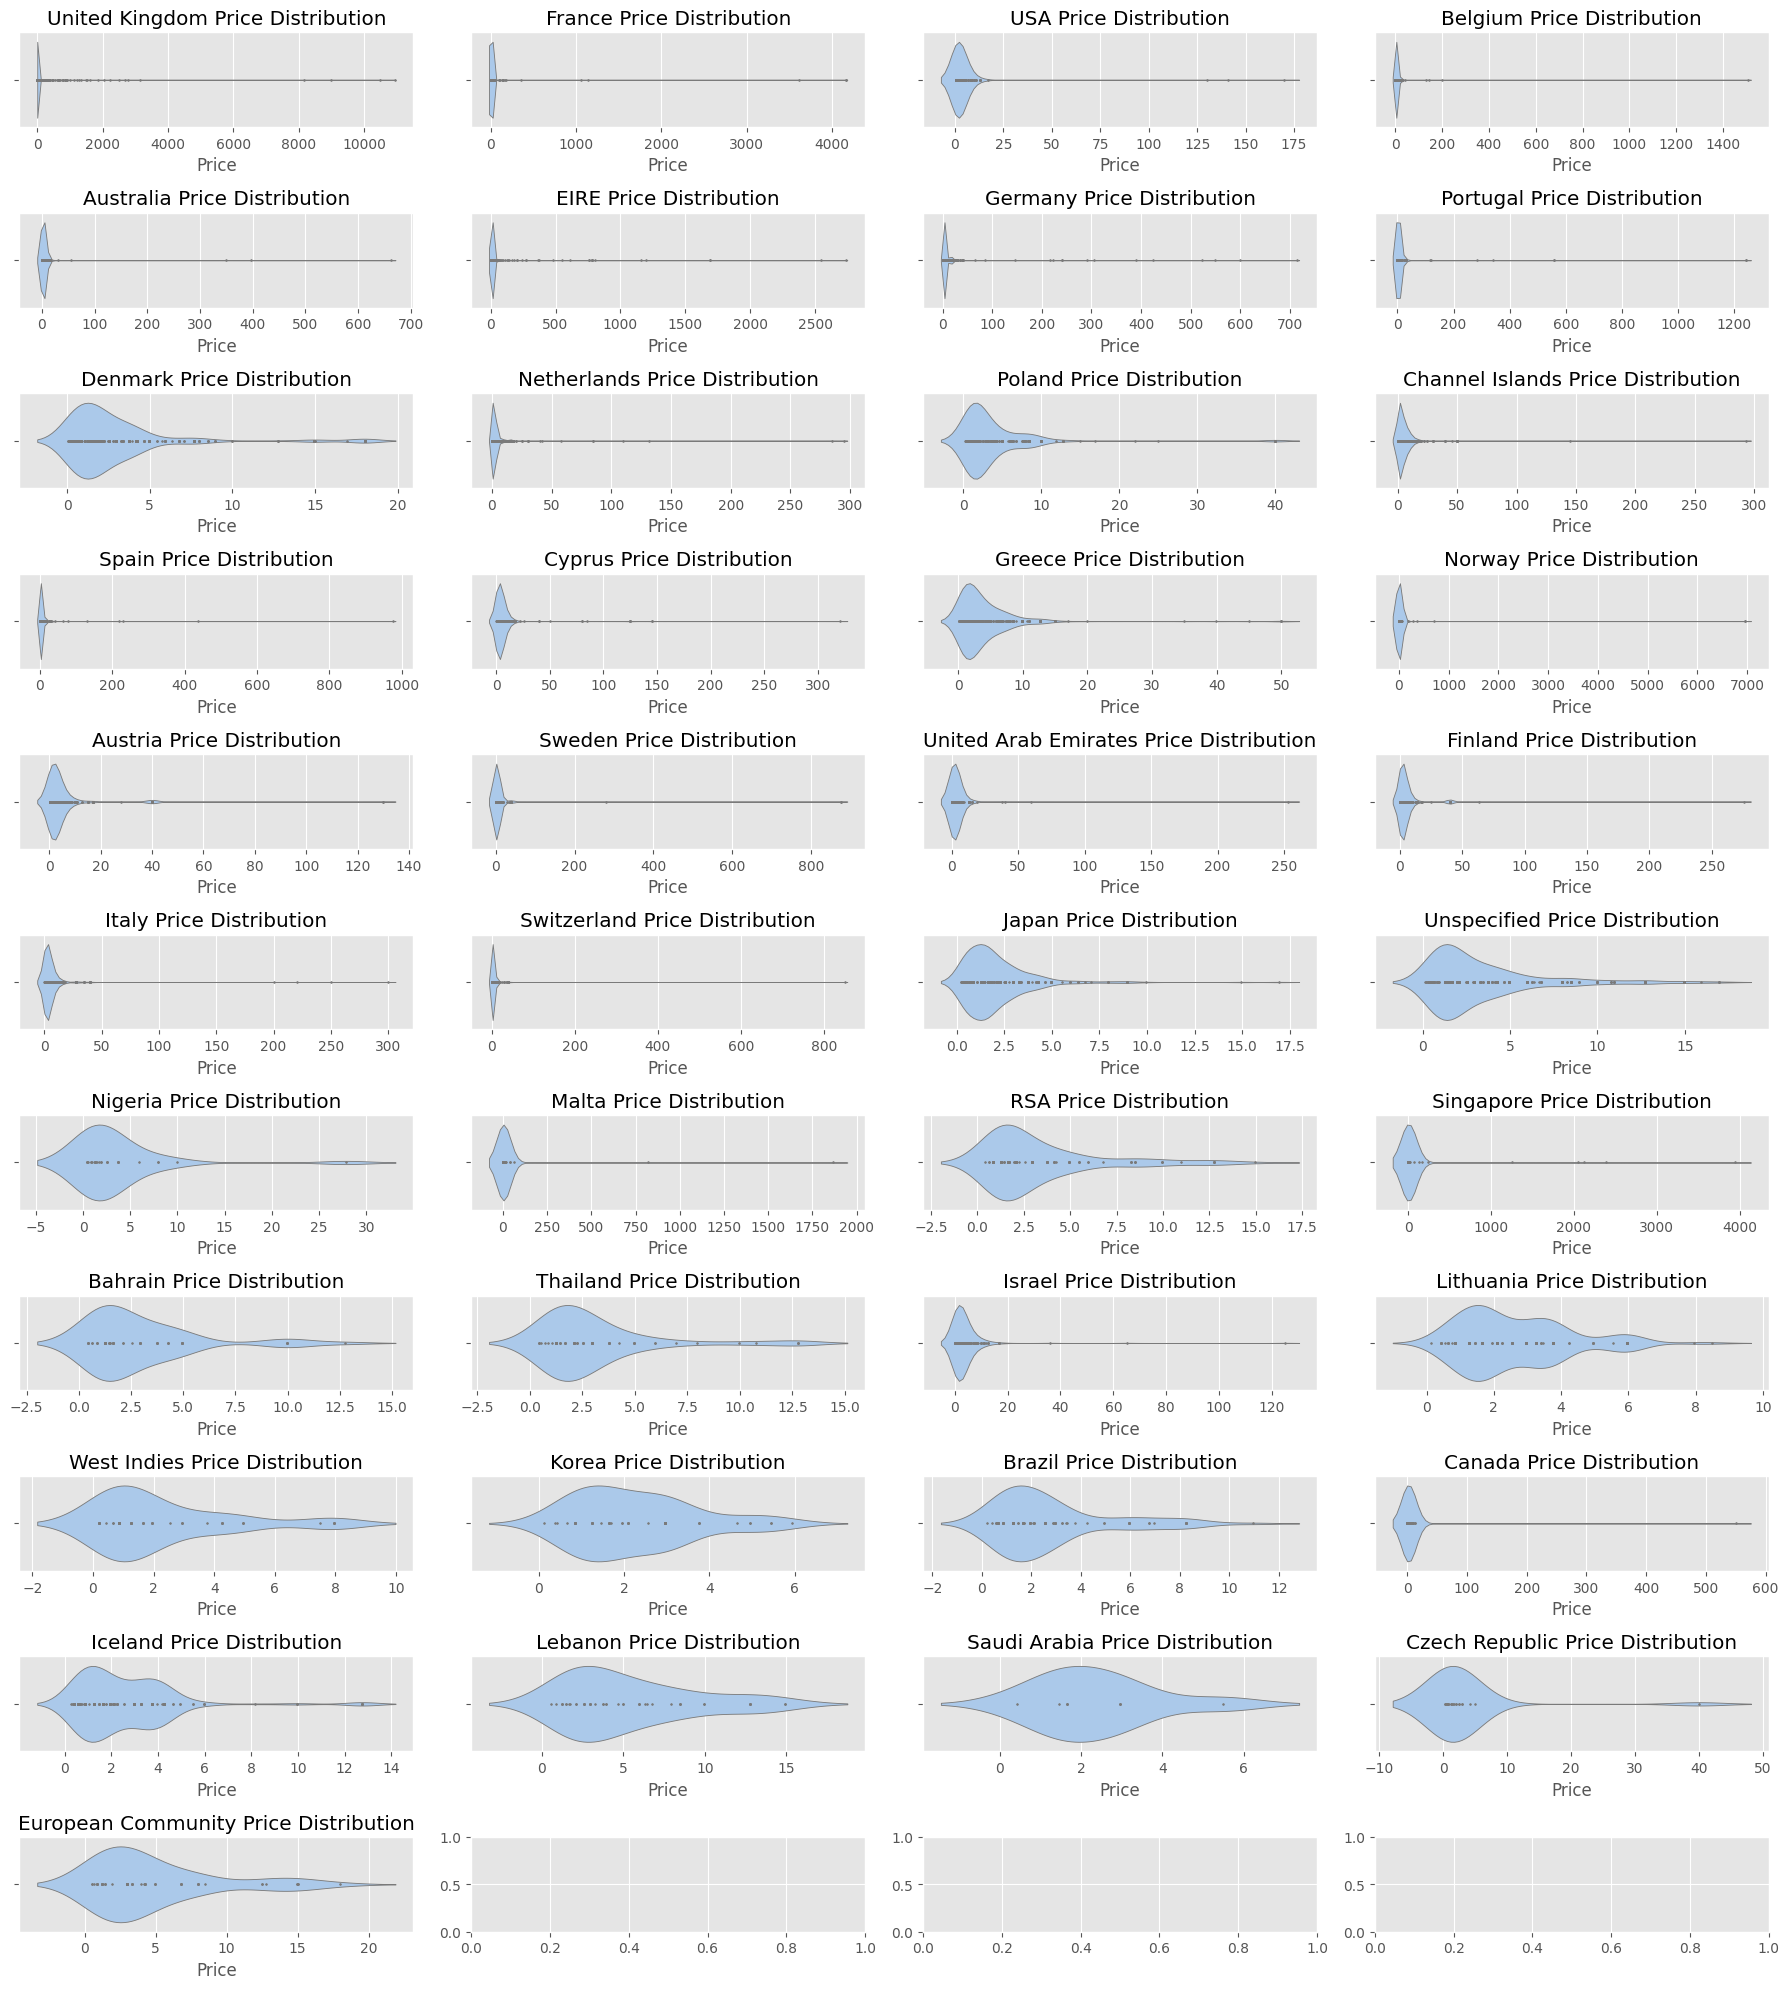

In [179]:
fig, ax = plt.subplots(11, 4, figsize=(18, 20))
axes_ = [axes_row for axes in ax for axes_row in axes]

# Tạo biểu đồ violin cho từng quốc gia
for i, c in enumerate(countries):
    sns.violinplot(x="Price", data=data[data["Country"] == c], ax=axes_[i], inner="point", palette="pastel")
    axes_[i].set_title(c + ' ' + "Price Distribution")
    plt.tight_layout()

Từ biểu đồ trên, điều tôi có thể hiểu là hầu hết dữ liệu khá sai lệch và có rất nhiều giá trị cực cao hiện diện trong dữ liệu.

In [180]:
# Đếm số lượng hóa đơn duy nhất
len(data["Invoice"].unique())

36969

In [181]:
data.groupby("Invoice").sum(numeric_only=True)

,StockCode,Quantity,Price,Customer ID,Total Amount,Year,Month,Day,Hour
Invoice,,,,,,,,,
489434,15813,166,32.65,104680.0,505.30,16072,96,8,56
489435,6043,60,10.50,52340.0,145.80,8036,48,4,28
489436,35671,193,70.88,248482.0,630.33,38171,228,19,171
489437,31573,145,83.45,353326.0,310.75,46207,276,23,207
489438,41282,826,44.05,307734.0,2286.24,34153,204,17,153
...,...,...,...,...,...,...,...,...,...
581583,4247,76,3.30,27554.0,124.60,4022,24,18,24
581584,4327,120,2.57,27554.0,140.64,4022,24,18,24
581585,45893,278,37.78,331884.0,329.05,42231,252,189,252


In [182]:
# Nhóm và tính tổng theo "Invoice"
temp_invoice_df = data.groupby("Invoice").sum(numeric_only=True)

In [183]:
temp_invoice_df.reset_index(inplace=True)

In [184]:
#Below are the top 30 invoices with total quantity purchased by them
temp_invoice_df.sort_values(by = "Quantity", ascending = False).head(30).iloc[:,:2].style.background_gradient(cmap = "Blues")

,Invoice,StockCode
11078,518505,82957
13423,524174,82957
3062,497946,45099
36936,581483,2726
20346,541431,2324
4377,501534,11466
2096,495194,7012
4691,502269,4887
1604,493819,163332
1047,491812,98592


In [185]:
# Nhóm dữ liệu theo "Invoice" và tính trung bình các cột số
mean_invoice_df = data.groupby("Invoice").mean(numeric_only=True)

In [186]:
sorted_mean_price = temp_invoice_df.head(15).iloc[:, [3]].sort_values("Price", ascending=False)
sorted_mean_price

,Price
10,141.00
13,130.00
12,84.20
3,83.45
2,70.88
5,67.64
11,47.08
8,46.94
4,44.05
0,32.65


Ta  nhóm dữ liệu theo Invoice để xem mức chi tiêu trung bình theo Invoice Number. Ở đây có một điều thú vị khi thấy rằng Invoice có số **489444** & **489447** đã chi nhiều hơn những Invoice khác. Vì vậy, để hiểu rõ hơn, hãy kiểm tra 2 Invoice này và biết thông tin chi tiết về số lượng họ đã mua cho đến nay.

In [187]:
data[(data["Invoice"] == 489444) | (data["Invoice"] == 489447)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Amount,Year,Month,Day,Hour
126,489444,4627,POSTAGE,1,2009-12-01 09:55:00,141.0,12636.0,USA,141.0,2009,12,1,9
173,489447,4627,POSTAGE,1,2009-12-01 10:10:00,130.0,12362.0,Belgium,130.0,2009,12,1,10


### **INITIAL EDA INSIGHTS:**

1) Hầu hết khách hàng đến từ Vương quốc Anh, tiếp theo là Đức, EIRE và Pháp.

2) Nếu chúng tôi kiểm tra mức giá bán trung bình theo các quốc gia, điều chúng tôi quan sát được là Singapore có mức giá bán trung bình cao nhất, tiếp theo là Na Uy và Malta.

3) Hầu hết dữ liệu của các quốc gia bị sai lệch khi nói đến tính năng Giá với nhiều giá trị cực cao hơn.

4) Có tổng cộng 44876 đơn vị được mua cho đến nay.

5) Chúng tôi cũng đã quan sát thấy một số Hóa đơn đã mua hầu hết số lượng trong vòng 2 năm.

6) Khi nói đến mức chi tiêu trung bình, có 2 hóa đơn với số 489444 và 489447 có mức chi tiêu trung bình cao nhất nhưng khi kiểm tra, chúng tôi cũng nhận thấy số lần mua sản phẩm trung bình chỉ là 1 hóa đơn từ Mỹ, tiếp theo là Bỉ.

# Time Series Analyst

In [188]:
data.head(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Amount,Year,Month,Day,Hour
0,489434,4009,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009,12,1,7
1,489434,3326,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12,1,7
2,489434,3328,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12,1,7
3,489434,1253,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009,12,1,7
4,489434,618,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009,12,1,7
5,489434,1276,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.60,2009,12,1,7
6,489434,1143,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009,12,1,7
7,489434,860,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.50,2009,12,1,7
8,489435,1546,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.60,2009,12,1,7
9,489435,1545,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,45.00,2009,12,1,7


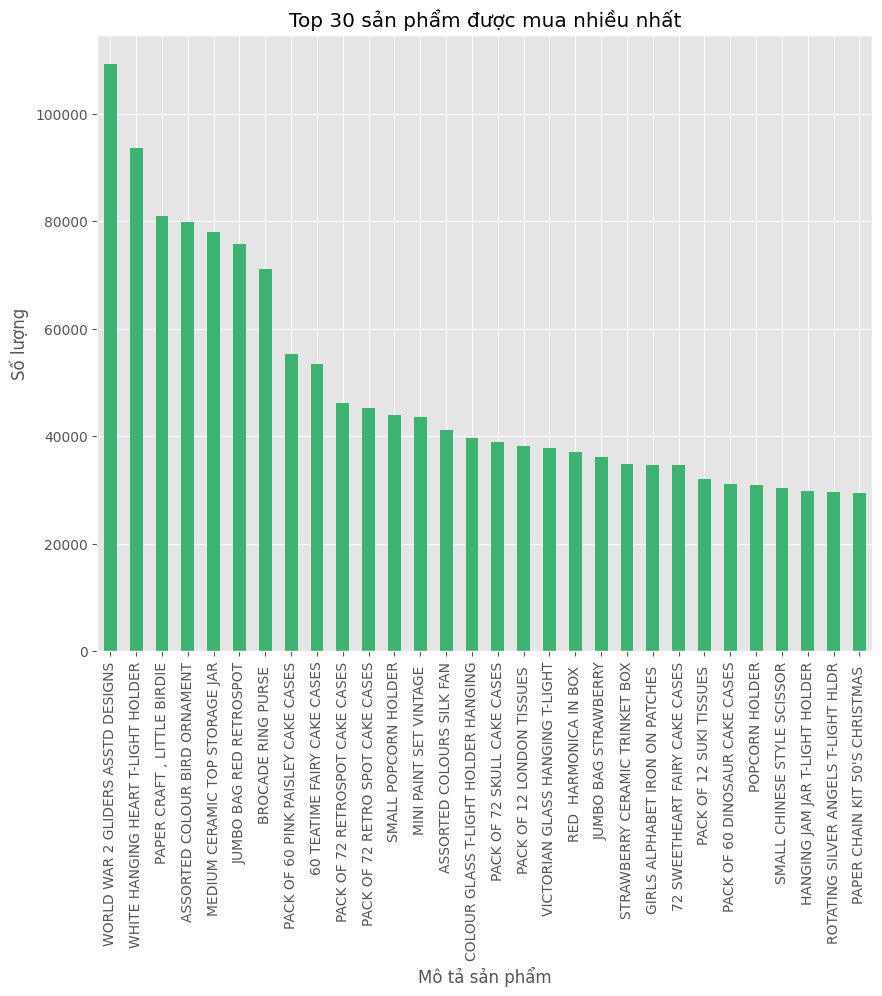

In [189]:
temp_description_df = data.groupby("Description").sum(numeric_only=True)

# Sắp xếp theo cột "Quantity" giảm dần và lấy 30 sản phẩm đầu tiên
top_30_products = temp_description_df.sort_values(by="Quantity", ascending=False).head(30)

# Tạo biểu đồ cột
plt.figure(figsize=(10, 8))
top_30_products["Quantity"].plot(kind="bar", color='mediumseagreen')
plt.title('Top 30 sản phẩm được mua nhiều nhất')
plt.xlabel('Mô tả sản phẩm')
plt.ylabel('Số lượng')
plt.show()

In [190]:
temp_data = data_copy.copy()

In [191]:
temp_data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Amount,Year,Month,Day,Hour
0,489434,4009,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,1,7
1,489434,3326,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,7
2,489434,3328,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,7
3,489434,1253,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12,1,7
4,489434,618,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12,1,7


In [192]:
#Date Time Analysis
temp_data.loc[:, "Month"] = data.InvoiceDate.dt.month
temp_data.loc[:, "Time"] = data.InvoiceDate.dt.time
temp_data.loc[:, "Year"] = data.InvoiceDate.dt.year
temp_data.loc[:, "Day"] = data.InvoiceDate.dt.day
temp_data.loc[:, "Quarter"] = data.InvoiceDate.dt.quarter
temp_data.loc[:, "Day of Week"] = data.InvoiceDate.dt.dayofweek

In [193]:
#Mapping day of week
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})

In [194]:
temp_data["Day of Week"] = temp_data["Day of Week"].map(dayofweek_mapping) 

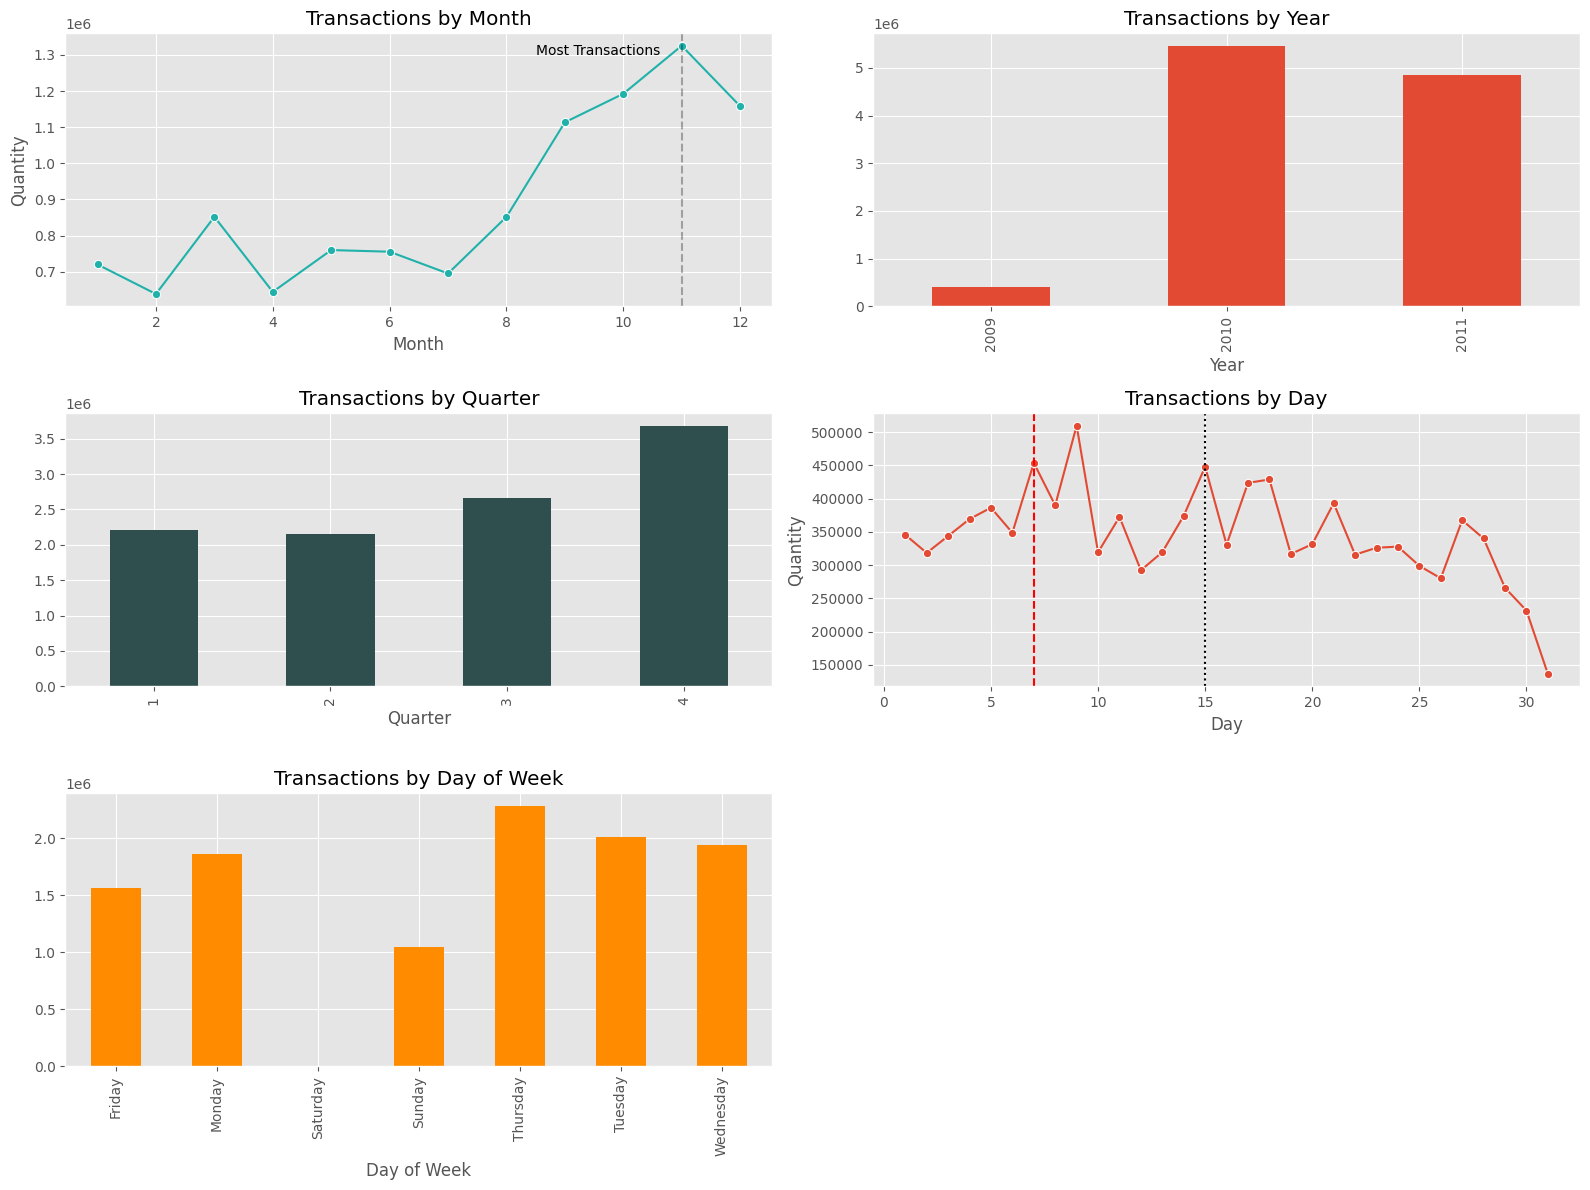

In [195]:
# Đảm bảo rằng các cột cần thiết là số
numeric_columns = temp_data.select_dtypes(include='number').columns

# Vẽ biểu đồ
plt.figure(figsize=(16, 12))

# Transactions by Month
plt.subplot(3, 2, 1)
monthly_data = temp_data.groupby("Month")[numeric_columns].sum()
sns.lineplot(x=monthly_data.index, y="Quantity", data=monthly_data, marker="o", color="lightseagreen")
plt.axvline(11, color="k", linestyle='--', alpha=0.3)
plt.text(8.50, 1.3e6, "Most Transactions")
plt.title("Transactions by Month")

# Transactions by Year
plt.subplot(3, 2, 2)
yearly_data = temp_data.groupby("Year")[numeric_columns].sum()
yearly_data["Quantity"].plot(kind="bar")
plt.title("Transactions by Year")

# Transactions by Quarter
plt.subplot(3, 2, 3)
quarterly_data = temp_data.groupby("Quarter")[numeric_columns].sum()
quarterly_data["Quantity"].plot(kind="bar", color="darkslategrey")
plt.title("Transactions by Quarter")

# Transactions by Day
plt.subplot(3, 2, 4)
daily_data = temp_data.groupby("Day")[numeric_columns].sum()
sns.lineplot(x=daily_data.index, y="Quantity", data=daily_data, marker="o")
plt.axvline(7, color='r', linestyle='--')
plt.axvline(15, color='k', linestyle="dotted")
plt.title("Transactions by Day")

# Transactions by Day of Week
plt.subplot(3, 2, 5)
day_of_week_data = temp_data.groupby("Day of Week")[numeric_columns].sum()
day_of_week_data["Quantity"].plot(kind="bar", color="darkorange")
plt.title("Transactions by Day of Week")

plt.tight_layout()
plt.show()

Như chúng ta có thể thấy, năm 2009 giao dịch khá thấp so với năm 2010 và 2011. Nhưng hiện tại, chúng ta không biết lý do đằng sau điều này nên hãy cùng tìm hiểu xem tại sao năm 2009 lại thấp so với 2 năm còn lại.

In [196]:
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2009]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2009]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2010]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2010]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2011]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2011]["Quantity"].sum()))

Total Number of Countries in 2009: 22
Total Number of Transactions in 2009: 400153
--------------------------------------------
Total Number of Countries in 2009: 37
Total Number of Transactions in 2009: 5450466
--------------------------------------------
Total Number of Countries in 2009: 36
Total Number of Transactions in 2009: 4855548


Thông qua phân tích này, chúng ta có thể đưa ra kết luận rằng có thể công ty đã bắt đầu hoạt động ở các quốc gia khác và bắt đầu mở rộng kinh doanh hơn nữa.

In [197]:
_2009 = temp_data[temp_data["Year"] == 2009]["Country"].unique()
_2010 = temp_data[temp_data["Year"] == 2010]["Country"].unique()
_2011 = temp_data[temp_data["Year"] == 2011]["Country"].unique()

In [198]:
no_cols = []

for i in (_2010):
    if i not in _2009:
        no_cols.append(i)
print("These are the values which are not present in 2009: {}".format(no_cols))

These are the values which are not present in 2009: ['Japan', 'Unspecified', 'Nigeria', 'Malta', 'RSA', 'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland']


In [199]:
# Nhóm dữ liệu theo "Country" và "Description" và tính tổng các cột số
temp = data.groupby(["Country", "Description"]).sum(numeric_only=True)["Quantity"]

# Hiển thị kết quả
print(temp)

Country      Description                      
Australia     DOLLY GIRL BEAKER                   200
              I LOVE LONDON MINI BACKPACK           4
             10 COLOUR SPACEBOY PEN                48
             12 PENCIL SMALL TUBE WOODLAND        384
             12 PENCILS SMALL TUBE RED SPOTTY      24
                                                 ... 
West Indies  VINTAGE BEAD PINK SCARF                3
             WHITE AND BLUE CERAMIC OIL BURNER      6
             WOODLAND PARTY BAG + STICKER SET       1
             WOVEN BERRIES CUSHION COVER            2
             WOVEN FROST CUSHION COVER              2
Name: Quantity, Length: 29447, dtype: int32


In [200]:
temp = pd.DataFrame(temp)

### Top 8 quốc gia có nhiều giao dịch nhất

In [201]:
top_8_countries = ["United Kingdom", "Netherlands", "EIRE", "Denmark", "Germany", "France", "Australia", "Sweden"]

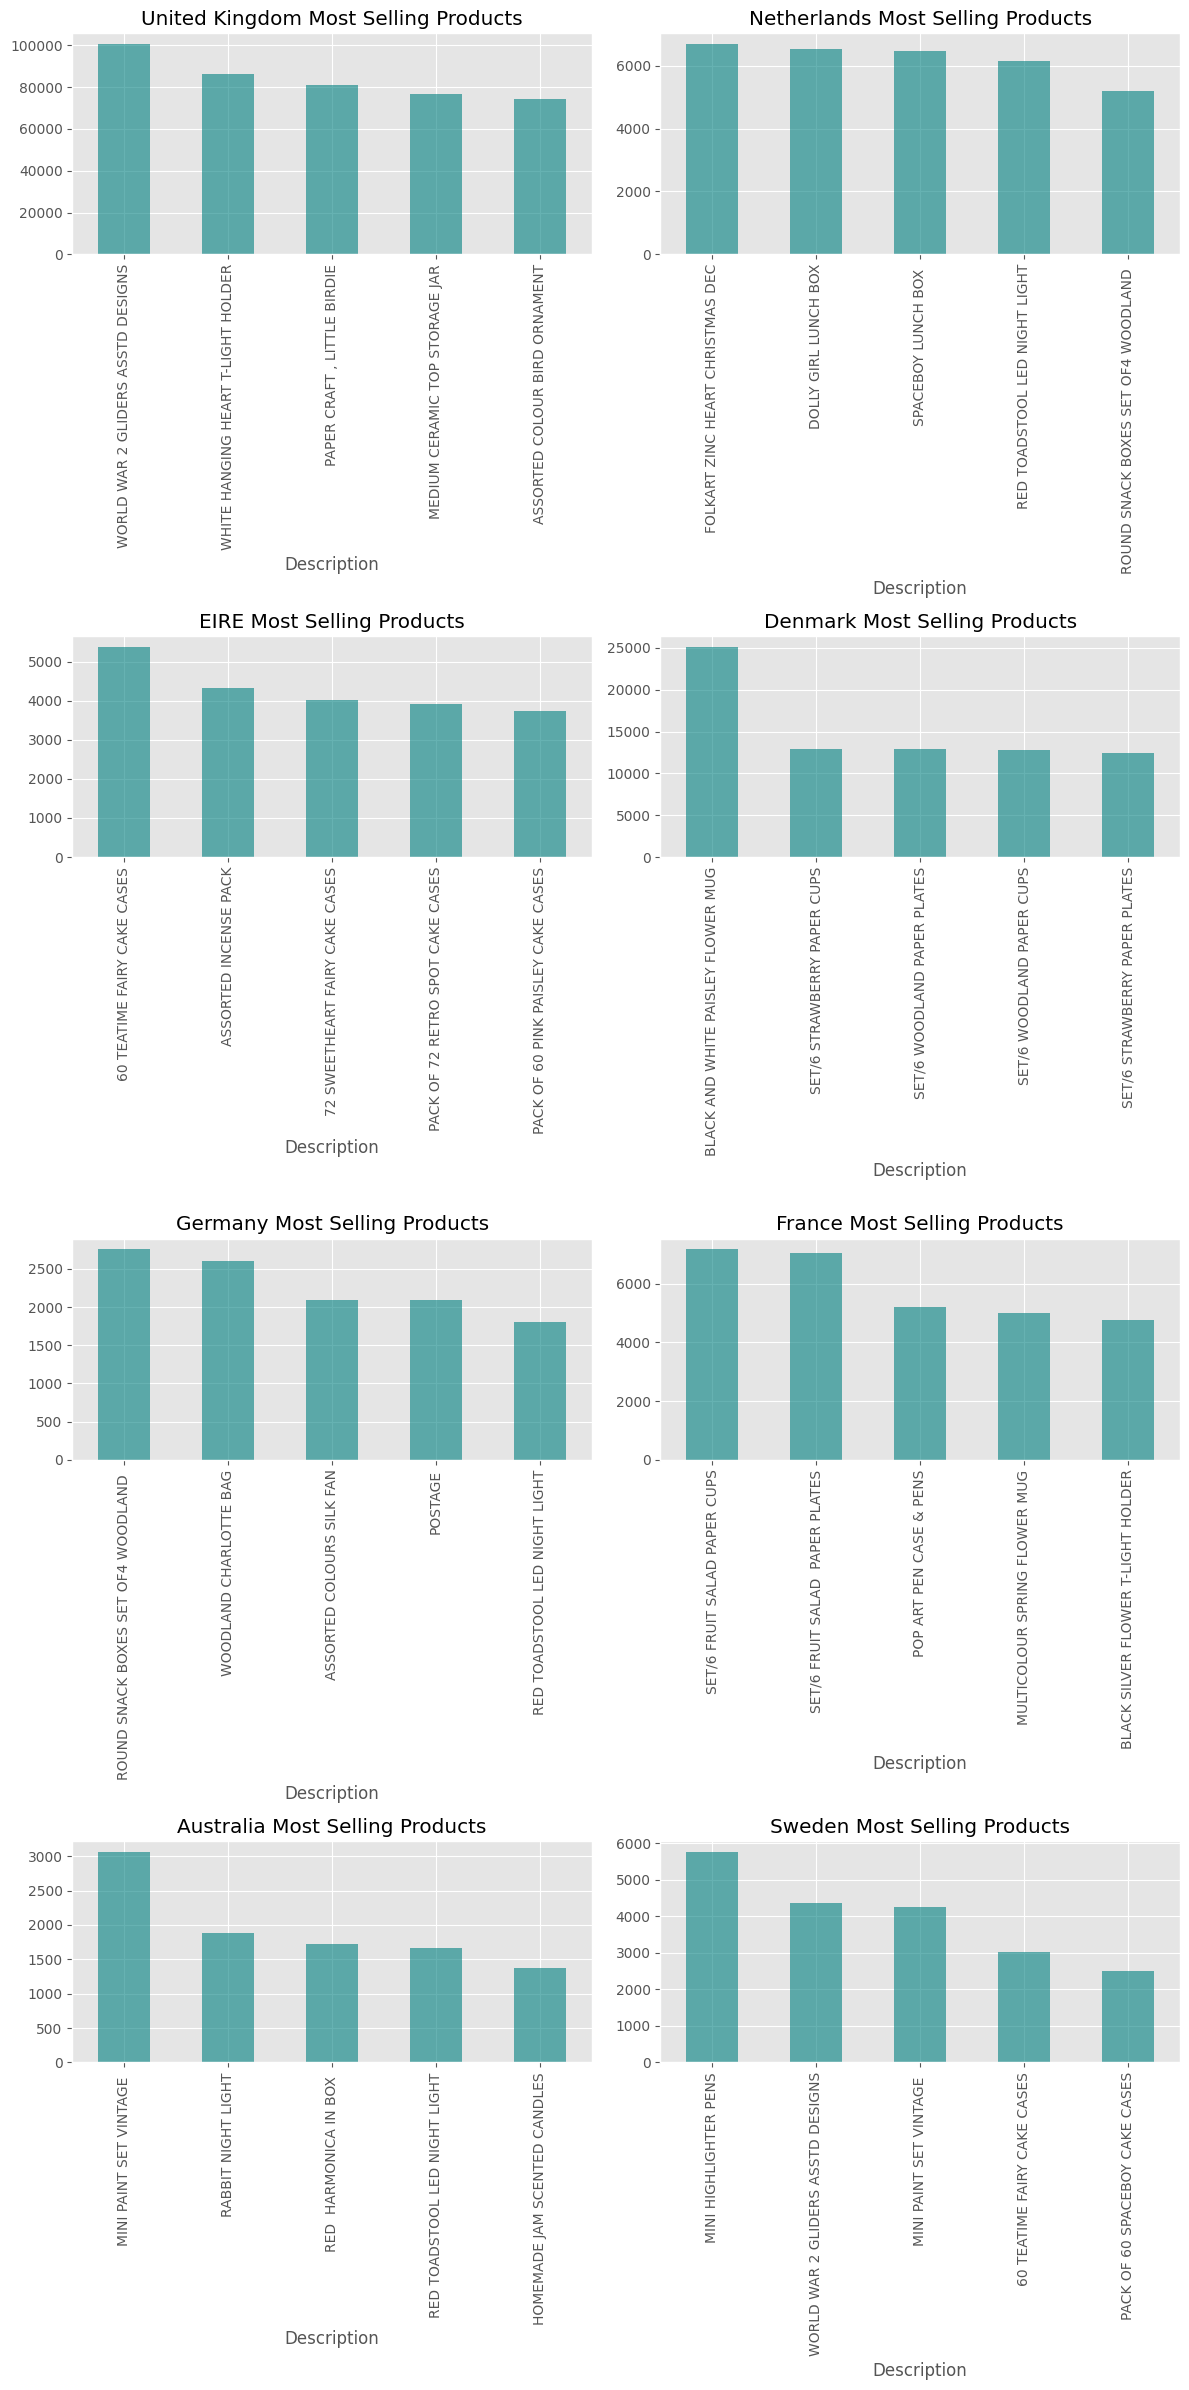

In [202]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(top_8_countries):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()

### Top 8 quốc gia có ít giao dịch nhất

In [203]:
least_8_country = ["Saudi Arabia", "Nigeria", "Lebanon", "West Indies", "European Community", "Brazil", "Czech Republic", "Korea"]

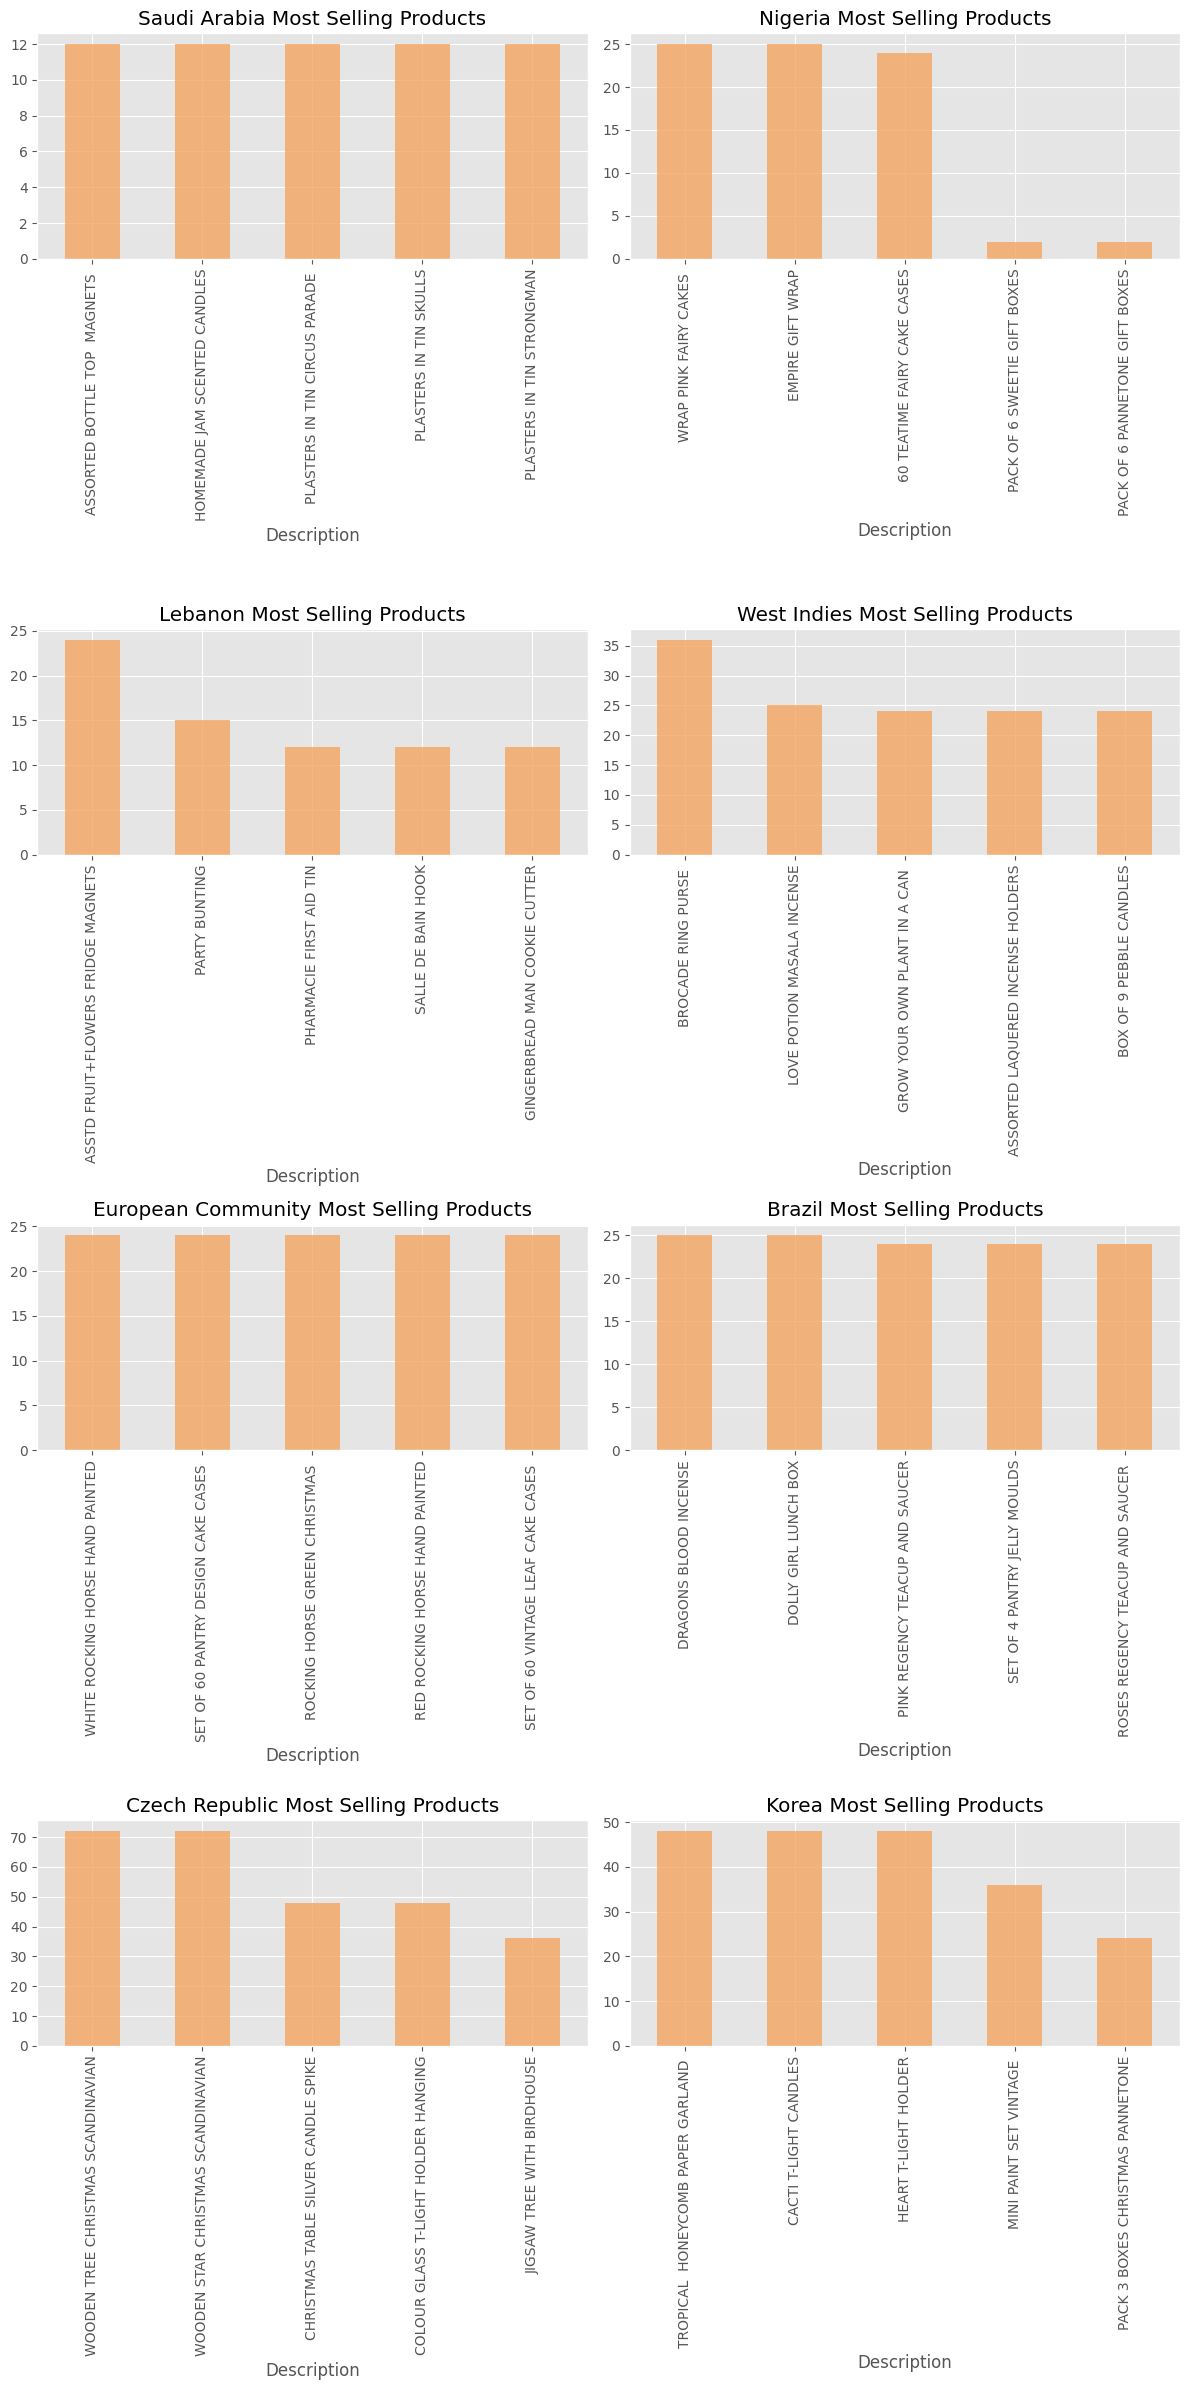

In [204]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(least_8_country):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "sandybrown", alpha = 0.8)
    
    plt.tight_layout()

In [205]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Amount,Year,Month,Day,Hour
0,489434,4009,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,1,7
1,489434,3326,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,7
2,489434,3328,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,7
3,489434,1253,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12,1,7
4,489434,618,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12,1,7


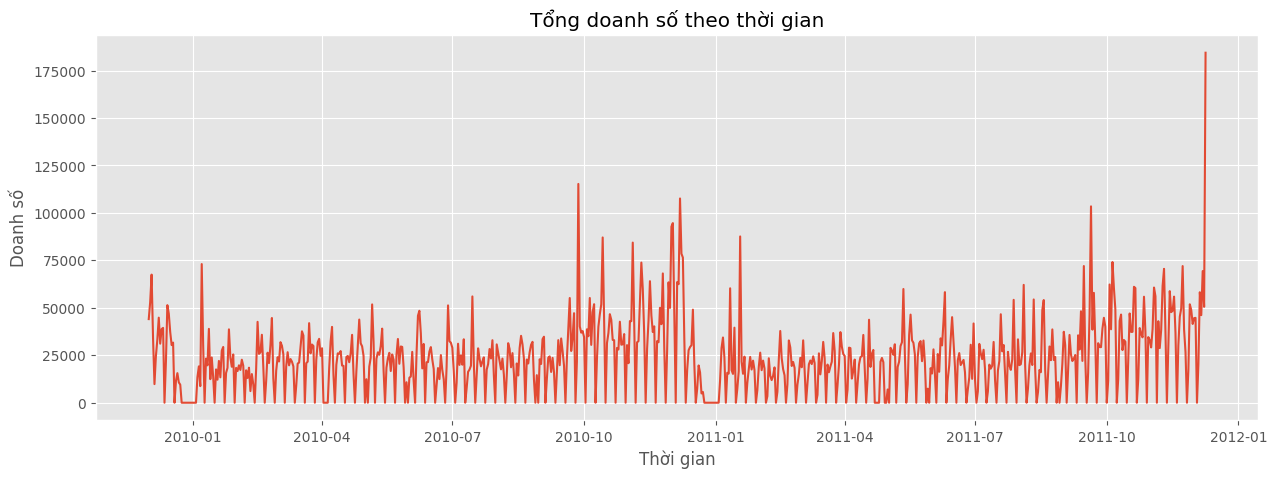

In [206]:


# Tạo DataFrame mới cho phân tích chuỗi thời gian
df_time = data.set_index('InvoiceDate')['Total Amount'].resample('D').sum()  # Doanh số theo ngày

# Phân tích tổng quan theo thời gian
plt.figure(figsize=(15, 5))
plt.plot(df_time)
plt.title('Tổng doanh số theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Doanh số')
plt.show()

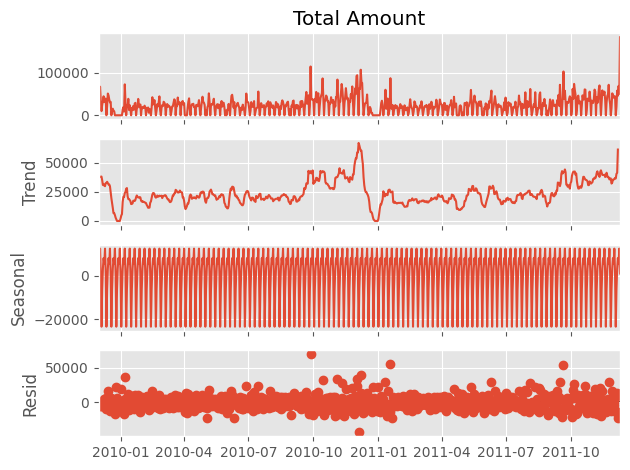

In [207]:
# Phân tích xu hướng và tính mùa vụ
result = seasonal_decompose(df_time, model='additive')  
result.plot()
plt.show()

In [208]:
# Dự báo
# Thay thế các giá trị 0 trong df_time bằng một giá trị rất nhỏ
df_time = df_time.replace(0, 0.01)
# Thay đổi trend và seasonal thành 'add'
model = ExponentialSmoothing(df_time, trend='add', seasonal='add', seasonal_periods=7)
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)  # Dự báo 30 ngày tiếp theo

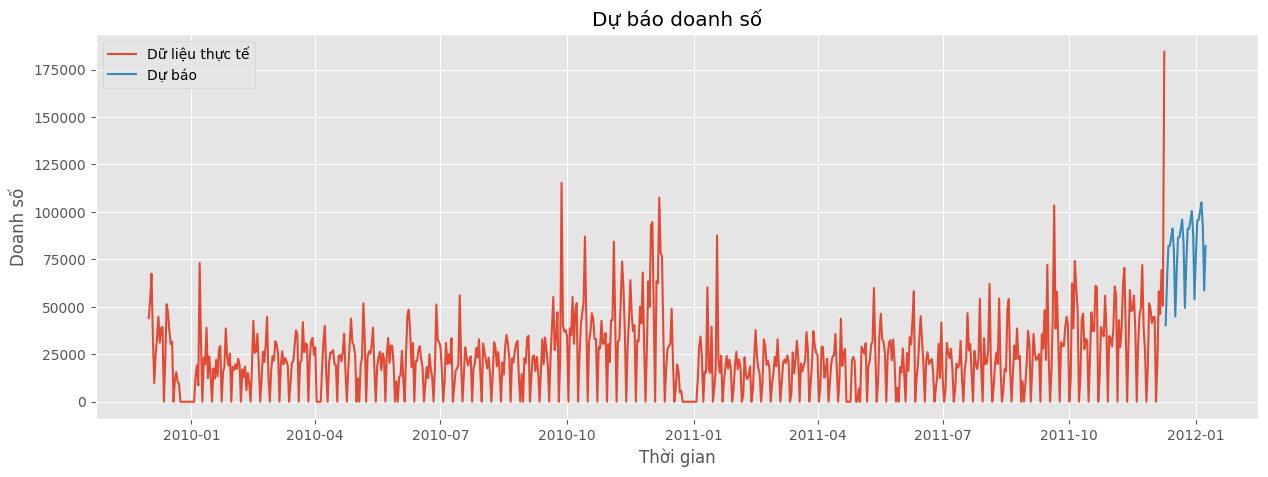

In [209]:
plt.figure(figsize=(15, 5))
plt.plot(df_time, label='Dữ liệu thực tế')
plt.plot(forecast, label='Dự báo')
plt.title('Dự báo doanh số')
plt.xlabel('Thời gian')
plt.ylabel('Doanh số')
plt.legend()
plt.show()

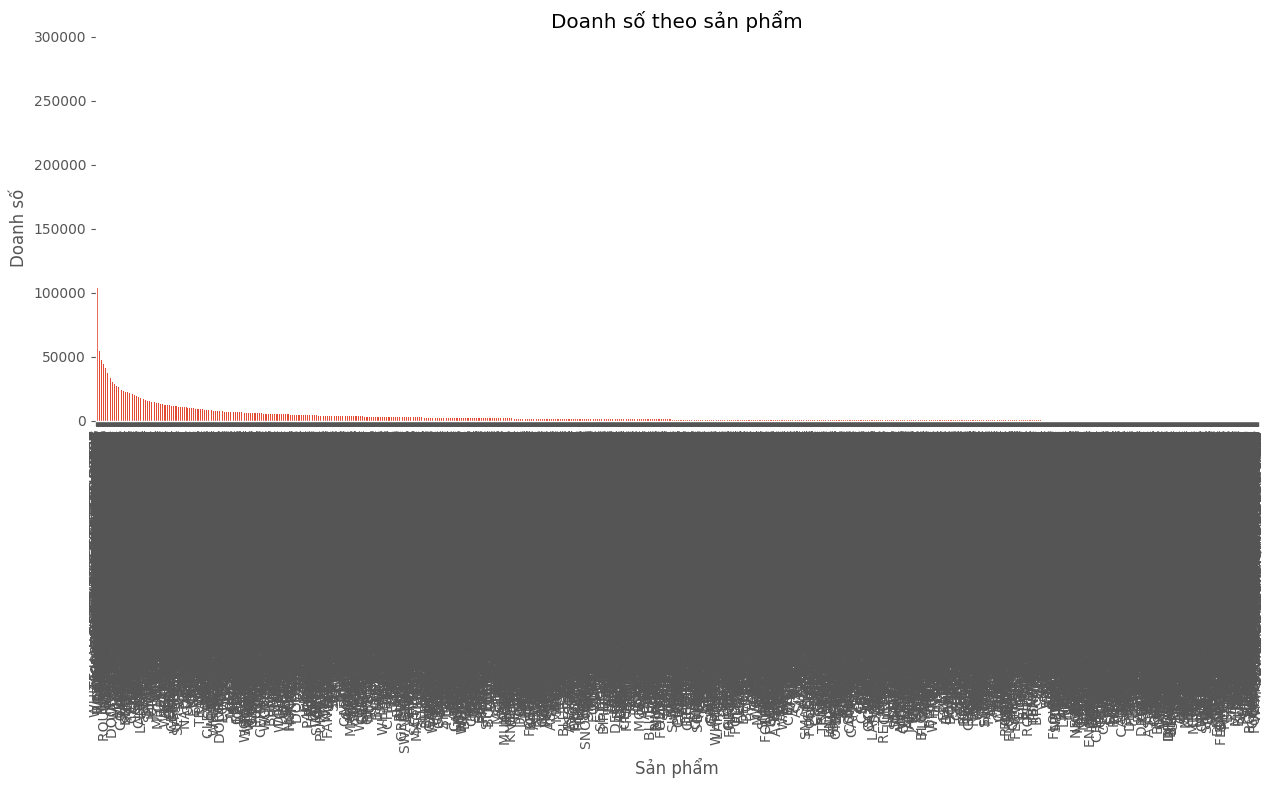

In [210]:
# Tính doanh số theo từng sản phẩm
product_sales = data.groupby('Description')['Total Amount'].sum()

# Vẽ biểu đồ doanh số theo sản phẩm
plt.figure(figsize=(15, 5))
product_sales.sort_values(ascending=False).plot(kind='bar')
plt.title('Doanh số theo sản phẩm')
plt.xlabel('Sản phẩm')
plt.ylabel('Doanh số')
plt.show()

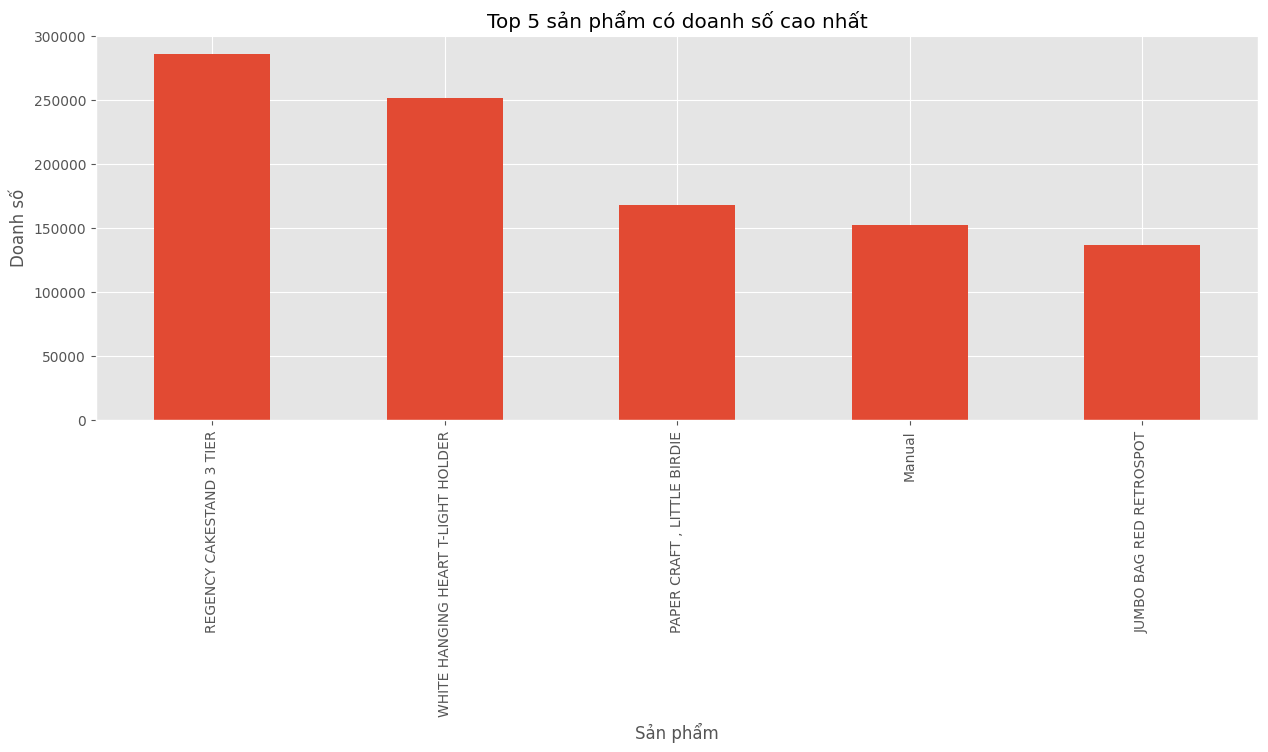

In [211]:
# Lấy top 5 sản phẩm có doanh số cao nhất
top_5_products = product_sales.sort_values(ascending=False).head(5)

# Vẽ biểu đồ doanh số của top 5 sản phẩm
plt.figure(figsize=(15, 5))
top_5_products.plot(kind='bar')
plt.title('Top 5 sản phẩm có doanh số cao nhất')
plt.xlabel('Sản phẩm')
plt.ylabel('Doanh số')
plt.show()

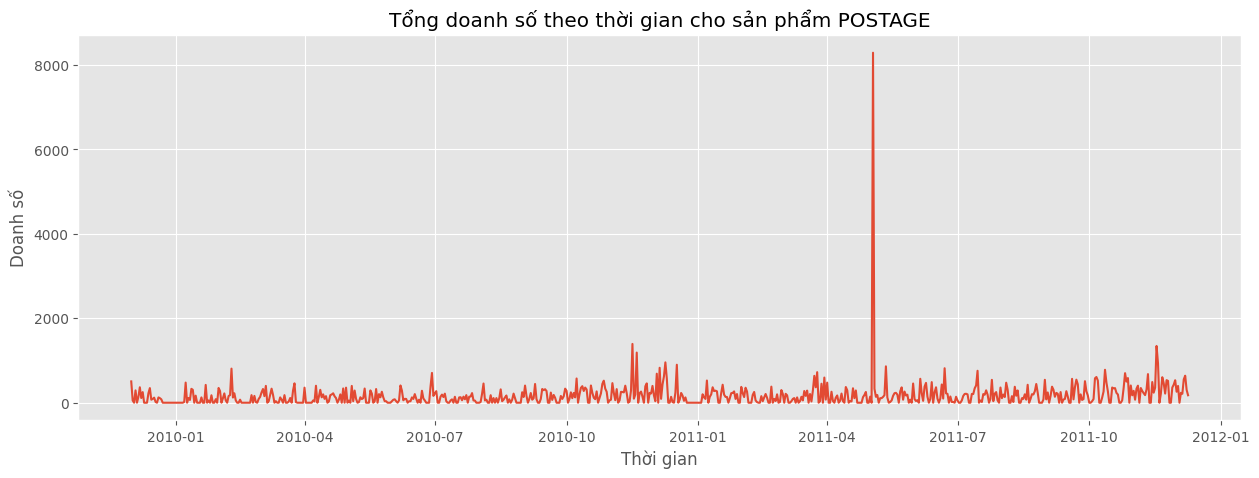

In [212]:
# Chọn sản phẩm cần dự báo
product_name = 'POSTAGE'  # Thay thế bằng tên sản phẩm cụ thể bạn muốn dự báo
df_product = data[data['Description'] == product_name]

# Tạo DataFrame mới cho phân tích chuỗi thời gian
df_product_time = df_product.set_index('InvoiceDate')['Total Amount'].resample('D').sum()  # Doanh số theo ngày

# Phân tích tổng quan theo thời gian
plt.figure(figsize=(15, 5))
plt.plot(df_product_time)
plt.title(f'Tổng doanh số theo thời gian cho sản phẩm {product_name}')
plt.xlabel('Thời gian')
plt.ylabel('Doanh số')
plt.show()

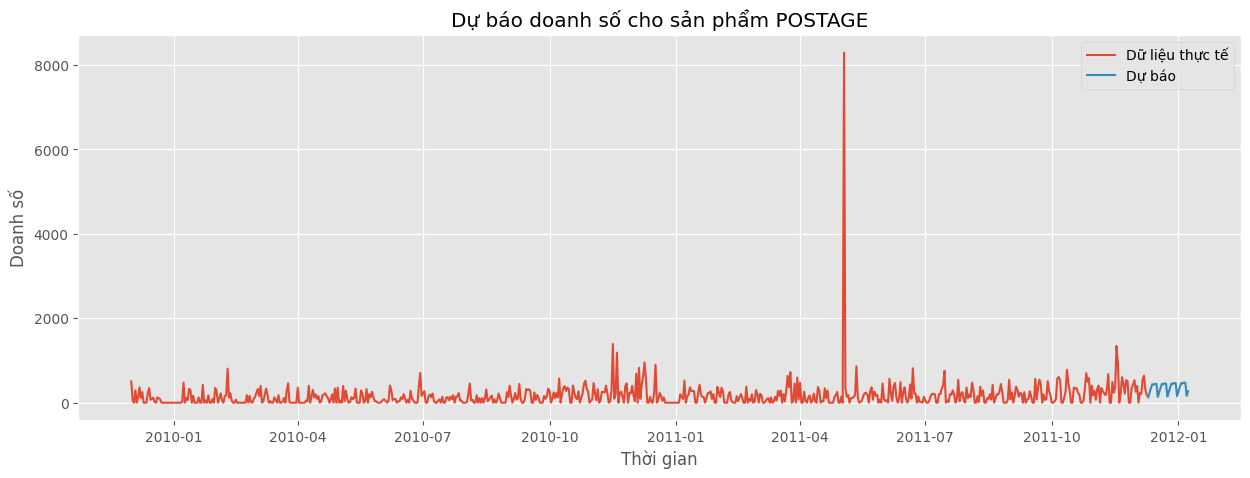

In [213]:
# Thay thế các giá trị 0 trong df_product_time bằng một giá trị rất nhỏ
df_product_time = df_product_time.replace(0, 0.01)

# Xây dựng mô hình dự báo sử dụng thành phần mùa vụ
model = ExponentialSmoothing(df_product_time, trend='add', seasonal='add', seasonal_periods=7)
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)  # Dự báo 30 ngày tiếp theo

# Vẽ biểu đồ dự báo
plt.figure(figsize=(15, 5))
plt.plot(df_product_time, label='Dữ liệu thực tế')
plt.plot(forecast, label='Dự báo')
plt.title(f'Dự báo doanh số cho sản phẩm {product_name}')
plt.xlabel('Thời gian')
plt.ylabel('Doanh số')
plt.legend()
plt.show()

### **EDA INSIGHTS:**


1) Top 5 sản phẩm bán chạy nhất của chúng ta là **World War 2 Gliders**, **White Hanging Heart**, **Assorted Colour Bird**, **Jumbo Bag Red**, **Brocade Ring**.

2) Hầu hết các giao dịch diễn ra vào tháng 11, thể hiện rõ nhất là do mùa lễ hội.

3) 2010 là năm chúng ta có nhiều giao dịch nhất, tiếp theo là năm 2011

4) Q4 là cao nhất về giao dịch.

5) Người ta cũng quan sát thấy rằng vào cuối tuần đầu tiên và đầu tuần thứ 3, mọi người có xu hướng mua nhiều hơn.

6) Mọi người thích mua sắm vào thứ Năm, sau đó là thứ Ba và thứ Tư.


### RFM Estimation - (Recency, Frequency, Monetary)

In [215]:
rfm_summary = lifetimes.utils.summary_data_from_transaction_data(data, "Customer ID", "InvoiceDate", "Total Amount")

In [216]:
rfm_summary.head()

,frequency,recency,T,monetary_value
Customer ID,,,,
12346.0,7.0,400.0,725.0,11066.637143
12347.0,7.0,402.0,404.0,717.398571
12348.0,4.0,363.0,438.0,449.310000
12349.0,3.0,571.0,589.0,1120.056667
12350.0,0.0,0.0,310.0,0.000000


In [217]:
rfm_summary.reset_index(inplace = True)

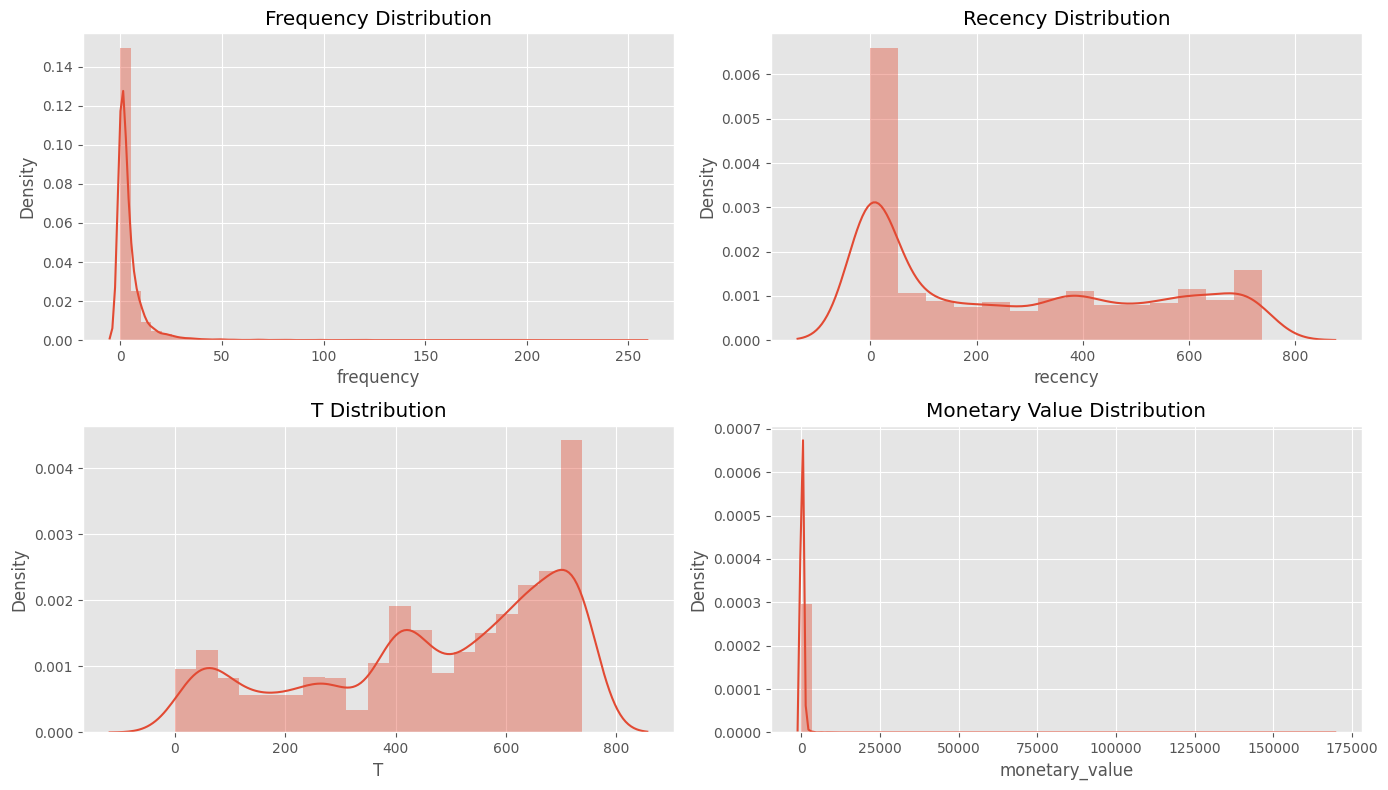

In [218]:
#plotting the distribution
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(rfm_summary["frequency"])
plt.title("Frequency Distribution")
plt.subplot(222)
sns.distplot(rfm_summary["recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(rfm_summary["T"])
plt.title("T Distribution")
plt.subplot(224)
sns.distplot(rfm_summary["monetary_value"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

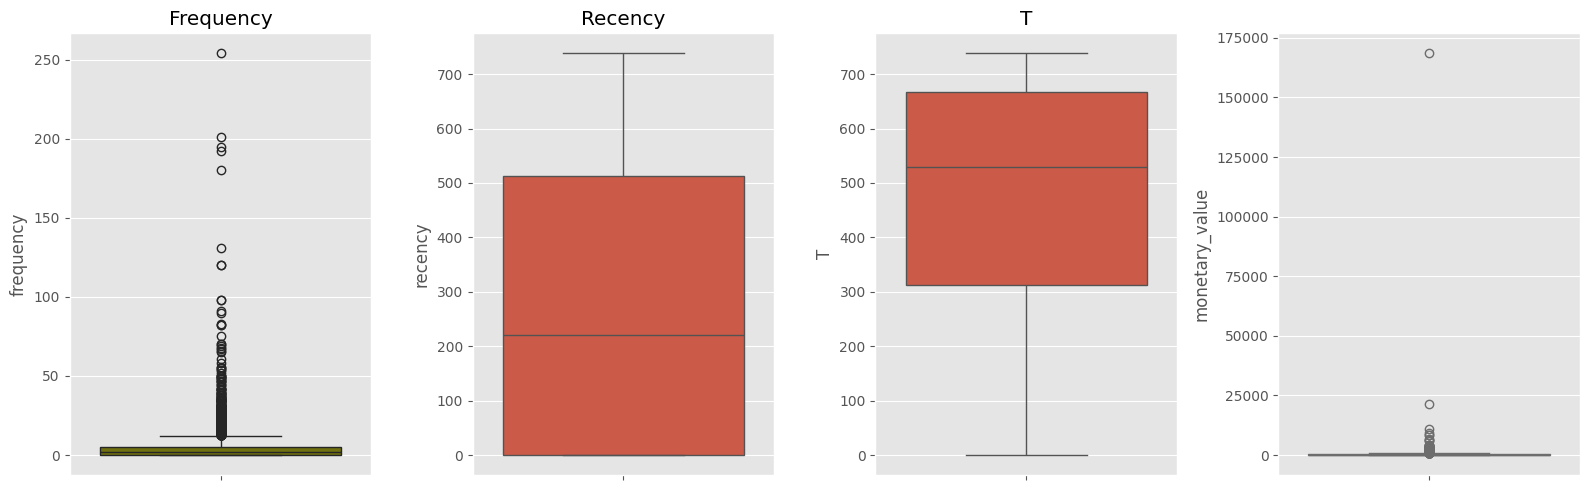

In [219]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(rfm_summary["frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(rfm_summary["recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(rfm_summary["T"])
plt.title("T")
plt.subplot(144)
sns.boxplot(rfm_summary["monetary_value"], color = "salmon")

plt.tight_layout()

In [220]:
rfm_summary.describe(percentiles = [0.01,0.1,0.25,0.50,0.75,0.90,0.99])

,Customer ID,frequency,recency,T,monetary_value
count,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000
mean,15315.313542,4.632358,273.393671,474.260463,319.052041
std,1715.572666,9.999783,258.964160,223.090893,2256.846401
min,12346.000000,0.000000,0.000000,0.000000,0.000000
1%,12405.770000,0.000000,0.000000,15.000000,0.000000
10%,12936.700000,0.000000,0.000000,89.000000,0.000000
25%,13833.250000,0.000000,0.000000,313.000000,0.000000
50%,15314.500000,2.000000,221.000000,530.000000,213.627500
75%,16797.750000,5.000000,512.000000,668.000000,376.209167
90%,17696.300000,11.000000,667.000000,730.000000,604.881850


## PARETO/NBD MODEL

In [221]:
def get_model(data, penalizer_val, time):
    
    pareto_result = data_copy.copy()

    pareto_model = ParetoNBDFitter(penalizer_coef = penalizer_val)
    pareto_model.fit(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

    #calculating the predicted_purchases

    t = time

    pareto_result["predicted_purchases"] = pareto_model.conditional_expected_number_of_purchases_up_to_time(t, pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])


    pareto_result["Actual_Purchases"] = pareto_result["frequency"]/pareto_result["recency"]*time

    #filling the null values
    pareto_result["Actual_Purchases"].fillna(0, inplace = True)


    #calculating the error
    pareto_result["Prediction_Error"] = pareto_result["Actual_Purchases"]-pareto_result["predicted_purchases"]

    #calcuating the purchase prediction error
    pareto_mse_purchase = mean_squared_error(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"])
    pareto_r2_purchase = r2_score(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"])
    pareto_rmse_purchase = sqrt(mean_squared_error(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"]))
    pareto_avg_error_purchase = pareto_result["Prediction_Error"].mean()
    
    #printing the purchase prediction error
    print("Predicted Purchase Mean Squared Error: %s" %(pareto_mse_purchase))
    print("Predicted Purchase R2 Score: %s" %(pareto_r2_purchase))
    print("Predicted Purchase Root Mean Squared Error: %s" %(pareto_rmse_purchase))
    print("Predicted Purchase Average Purchases Error: %s" %(pareto_avg_error_purchase))
    # Xử lý các giá trị âm trong 'Prediction_Error'
    pareto_result["Prediction_Error"] = pareto_result["Prediction_Error"].apply(lambda x: 0 if x < 0 else x)
    
    #plotting the prediction v/s actual purchase plot
    plt.figure(figsize=(6,4))
    # Sử dụng 'Prediction_Error' đã được xử lý
    plt.errorbar(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"], yerr=pareto_result["Prediction_Error"], fmt='o', color='darkseagreen',
             ecolor='grey', elinewidth=1.5, capsize=0, alpha=0.2)
    plt.title("Prediction v/s Actual")


Pareto/NBD Model - Predicted Purchase Mean Squared Error: 399.45252655720225
Pareto/NBD Model - Predicted Purchase R2 Score: 0.0
Pareto/NBD Model - Predicted Purchase Root Mean Squared Error: 19.986308477485338
Pareto/NBD Model - Predicted Purchase Average Purchases Error: 19.98630847747844


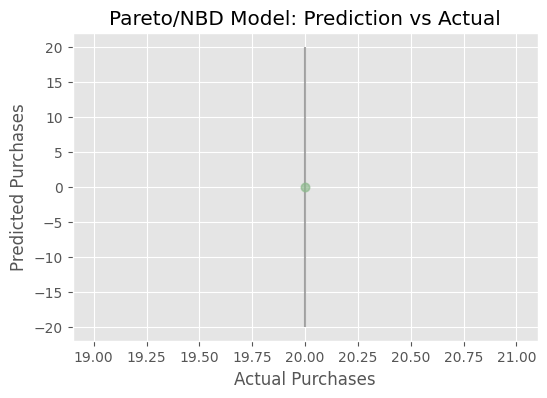

Linear Regression Model - Predicted Purchase Mean Squared Error: 0.0
Linear Regression Model - Predicted Purchase R2 Score: 1.0
Linear Regression Model - Predicted Purchase Root Mean Squared Error: 0.0
Linear Regression Model - Predicted Purchase Average Purchases Error: 0.0


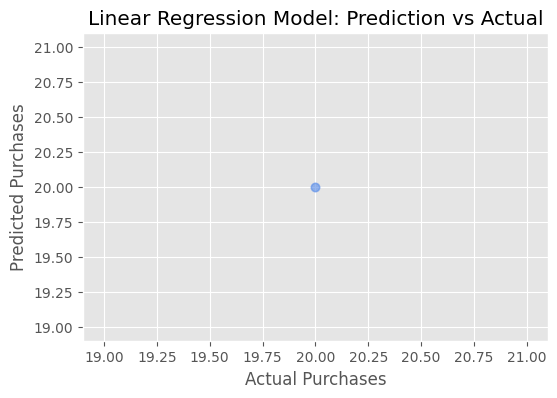

In [222]:
def get_model(data, penalizer_val, time):
    # Copy the data to avoid modifying the original dataset
    pareto_result = data.copy()

    # Pareto/NBD Model
    pareto_model = ParetoNBDFitter(penalizer_coef=penalizer_val)
    pareto_model.fit(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

    # Calculate the predicted purchases using Pareto/NBD Model
    t = time
    pareto_result["predicted_purchases"] = pareto_model.conditional_expected_number_of_purchases_up_to_time(
        t, pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

    # Calculate actual purchases
    pareto_result["Actual_Purchases"] = pareto_result["frequency"] / pareto_result["recency"] * time
    pareto_result["Actual_Purchases"].fillna(0, inplace=True)

    # Calculate the prediction error
    pareto_result["Prediction_Error"] = pareto_result["Actual_Purchases"] - pareto_result["predicted_purchases"]

    # Calculate error metrics for Pareto/NBD Model
    pareto_mse_purchase = mean_squared_error(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"])
    pareto_r2_purchase = r2_score(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"])
    pareto_rmse_purchase = sqrt(mean_squared_error(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"]))
    pareto_avg_error_purchase = pareto_result["Prediction_Error"].mean()
    pareto_result["Prediction_Error"] = pareto_result["Prediction_Error"].apply(lambda x: 0 if x < 0 else x)

    # Print Pareto/NBD Model error metrics
    print("Pareto/NBD Model - Predicted Purchase Mean Squared Error: %s" % (pareto_mse_purchase))
    print("Pareto/NBD Model - Predicted Purchase R2 Score: %s" % (pareto_r2_purchase))
    print("Pareto/NBD Model - Predicted Purchase Root Mean Squared Error: %s" % (pareto_rmse_purchase))
    print("Pareto/NBD Model - Predicted Purchase Average Purchases Error: %s" % (pareto_avg_error_purchase))

    # Plot prediction vs actual purchases for Pareto/NBD Model
    plt.figure(figsize=(6, 4))
    plt.errorbar(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"], yerr=pareto_result["Prediction_Error"], fmt='o', color='darkseagreen',
             ecolor='grey', elinewidth=1.5, capsize=0, alpha=0.2)
    plt.title("Pareto/NBD Model: Prediction vs Actual")
    plt.xlabel("Actual Purchases")
    plt.ylabel("Predicted Purchases")
    plt.show()

    # Linear Regression Model
    # Prepare the features and target variable
    X = pareto_result[["frequency", "recency", "T"]]
    y = pareto_result["Actual_Purchases"]

    # Initialize and fit the linear regression model
    linear_model = LinearRegression()
    linear_model.fit(X, y)

    # Make predictions using the linear regression model
    pareto_result["linear_predicted_purchases"] = linear_model.predict(X)

    # Calculate the prediction error for linear regression model
    pareto_result["Linear_Prediction_Error"] = pareto_result["Actual_Purchases"] - pareto_result["linear_predicted_purchases"]

    # Calculate error metrics for Linear Regression Model
    linear_mse_purchase = mean_squared_error(pareto_result["Actual_Purchases"], pareto_result["linear_predicted_purchases"])
    linear_r2_purchase = r2_score(pareto_result["Actual_Purchases"], pareto_result["linear_predicted_purchases"])
    linear_rmse_purchase = sqrt(mean_squared_error(pareto_result["Actual_Purchases"], pareto_result["linear_predicted_purchases"]))
    linear_avg_error_purchase = pareto_result["Linear_Prediction_Error"].mean()
    pareto_result["Linear_Prediction_Error"] = pareto_result["Linear_Prediction_Error"].apply(lambda x: 0 if x < 0 else x)

    # Print Linear Regression Model error metrics
    print("Linear Regression Model - Predicted Purchase Mean Squared Error: %s" % (linear_mse_purchase))
    print("Linear Regression Model - Predicted Purchase R2 Score: %s" % (linear_r2_purchase))
    print("Linear Regression Model - Predicted Purchase Root Mean Squared Error: %s" % (linear_rmse_purchase))
    print("Linear Regression Model - Predicted Purchase Average Purchases Error: %s" % (linear_avg_error_purchase))

    # Plot prediction vs actual purchases for Linear Regression Model
    plt.figure(figsize=(6, 4))
    plt.errorbar(pareto_result["Actual_Purchases"], pareto_result["linear_predicted_purchases"], yerr=pareto_result["Linear_Prediction_Error"], fmt='o', color='cornflowerblue',
             ecolor='grey', elinewidth=1.5, capsize=0, alpha=0.2)
    plt.title("Linear Regression Model: Prediction vs Actual")
    plt.xlabel("Actual Purchases")
    plt.ylabel("Predicted Purchases")
    plt.show()

# Example usage with dummy data (you should replace it with your actual dataset)
data = pd.DataFrame({
    "frequency": [2, 4, 6, 8, 10],
    "recency": [1, 2, 3, 4, 5],
    "T": [5, 6, 7, 8, 9]
})

penalizer_val = 0.0
time = 10
get_model(data, penalizer_val, time)


Pareto/NBD Model - Predicted Purchase Mean Squared Error: 2.2178230117696986
Pareto/NBD Model - Predicted Purchase R2 Score: 0.06087315665899773
Pareto/NBD Model - Predicted Purchase Root Mean Squared Error: 1.489235713972002
Pareto/NBD Model - Predicted Purchase Average Purchases Error: 0.23292379941715954


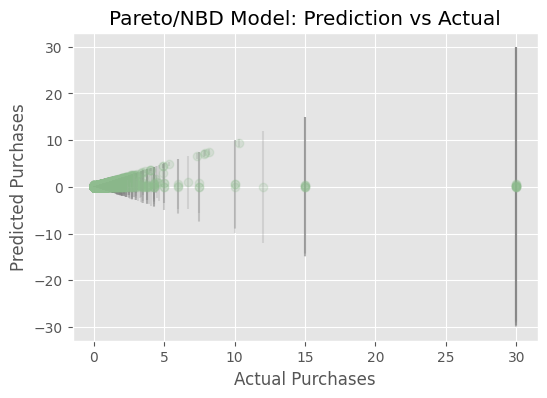

Linear Regression Model - Predicted Purchase Mean Squared Error: 2.1727377905563388
Linear Regression Model - Predicted Purchase R2 Score: 0.07996428397381805
Linear Regression Model - Predicted Purchase Root Mean Squared Error: 1.4740209600125564
Linear Regression Model - Predicted Purchase Average Purchases Error: -1.1121118014618785e-16


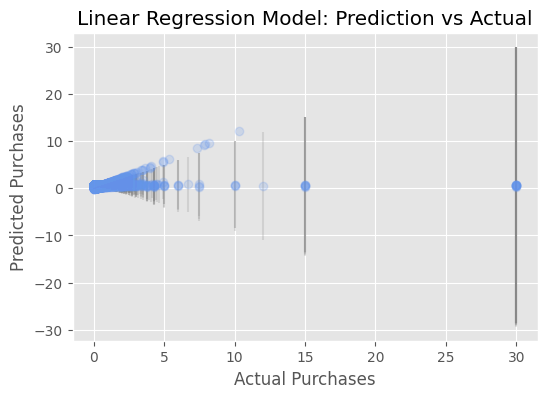

In [223]:
get_model(rfm_summary, 0.001, 30)

Dựa trên các lỗi trên, chúng tôi nhận thấy rằng penalizer_coef = 0,1 đang hoạt động tốt hơn một chút trong việc giảm thiểu lỗi, vì vậy chúng tôi sẽ sử dụng 0,1 cho mô hình của mình.

In [224]:
pareto_model = lifetimes.ParetoNBDFitter(penalizer_coef = 0.1)

In [225]:
pareto_model.fit(rfm_summary["frequency"],rfm_summary["recency"],
                rfm_summary["T"])

<lifetimes.ParetoNBDFitter: fitted with 5878 subjects, alpha: 71.97, beta: 383.04, r: 0.74, s: 0.18>

<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

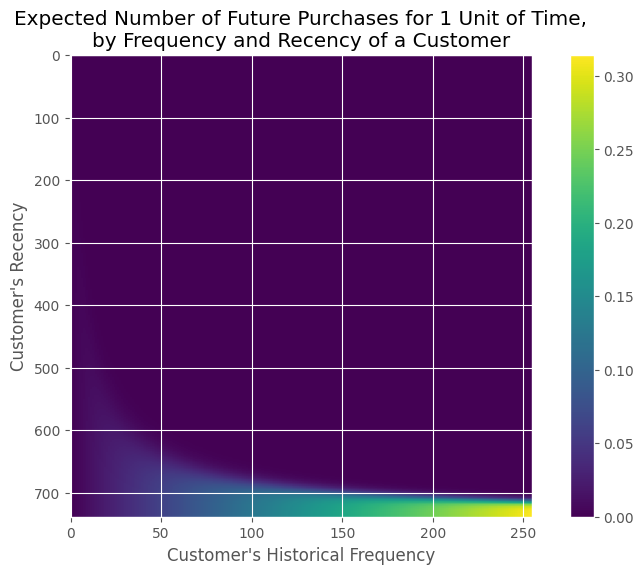

In [226]:
plt.figure(figsize=(10,6))
plot_frequency_recency_matrix(pareto_model)

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

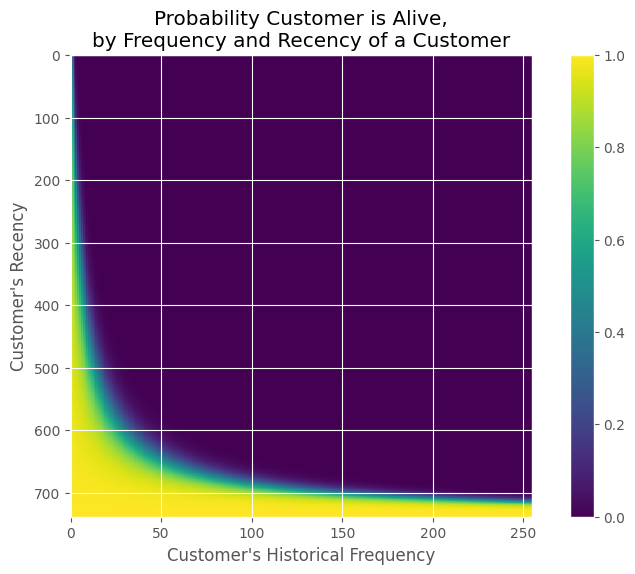

In [227]:
plt.figure(figsize=(10,6))
plot_probability_alive_matrix(pareto_model)

In [228]:
data = data_copy.copy()
rfm_summary = lifetimes.utils.summary_data_from_transaction_data(data, "Customer ID", "InvoiceDate", "Total Amount")
pareto_result = rfm_summary.copy()

In [229]:
pareto_result["p_not_alive"] = 1-pareto_model.conditional_probability_alive(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])
pareto_result["p_alive"] = pareto_model.conditional_probability_alive(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

In [230]:
pareto_result.head()

,frequency,recency,T,monetary_value,p_not_alive,p_alive
Customer ID,,,,,,
12346.0,7.0,400.0,725.0,11066.637143,0.467498,0.532502
12347.0,7.0,402.0,404.0,717.398571,0.000468,0.999532
12348.0,4.0,363.0,438.0,449.310000,0.025383,0.974617
12349.0,3.0,571.0,589.0,1120.056667,0.003559,0.996441
12350.0,0.0,0.0,310.0,0.000000,0.168504,0.831496


In [231]:
t = 30
pareto_result["predicted_purchases"] = pareto_model.conditional_expected_number_of_purchases_up_to_time(t, pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

In [232]:
pareto_result

,frequency,recency,T,monetary_value,p_not_alive,p_alive,predicted_purchases
Customer ID,,,,,,,
12346.0,7.0,400.0,725.0,11066.637143,0.467498,0.532502,0.154746
12347.0,7.0,402.0,404.0,717.398571,0.000468,0.999532,0.485886
12348.0,4.0,363.0,438.0,449.310000,0.025383,0.974617,0.270807
12349.0,3.0,571.0,589.0,1120.056667,0.003559,0.996441,0.168624
12350.0,0.0,0.0,310.0,0.000000,0.168504,0.831496,0.048059
...,...,...,...,...,...,...,...
18283.0,18.0,655.0,658.0,146.405556,0.000543,0.999457,0.767718
18284.0,0.0,0.0,431.0,0.000000,0.223859,0.776141,0.034087
18285.0,0.0,0.0,660.0,0.000000,0.310741,0.689259,0.020816


<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

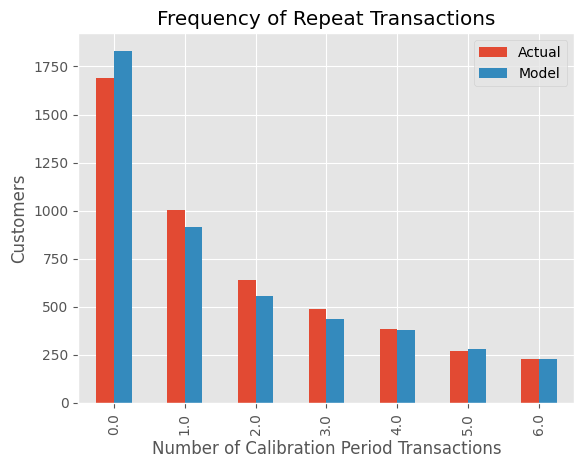

In [233]:
plot_period_transactions(pareto_model)

In [234]:
#dividing our dataset into training & holdout
pareto_summary_cal_holdout = calibration_and_holdout_data(data, "Customer ID", "InvoiceDate", 
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')

In [235]:
pareto_summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
Customer ID,,,,,
12346.0,7.0,400.0,541.0,0.0,184.0
12347.0,3.0,158.0,220.0,4.0,184.0
12348.0,3.0,190.0,254.0,1.0,184.0
12349.0,2.0,182.0,405.0,1.0,184.0
12350.0,0.0,0.0,126.0,0.0,184.0


In [236]:
pareto_model.fit(pareto_summary_cal_holdout["frequency_cal"],
               pareto_summary_cal_holdout["recency_cal"],
               pareto_summary_cal_holdout["T_cal"])

<lifetimes.ParetoNBDFitter: fitted with 4960 subjects, alpha: 74.74, beta: 1454.98, r: 0.75, s: 0.63>

<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

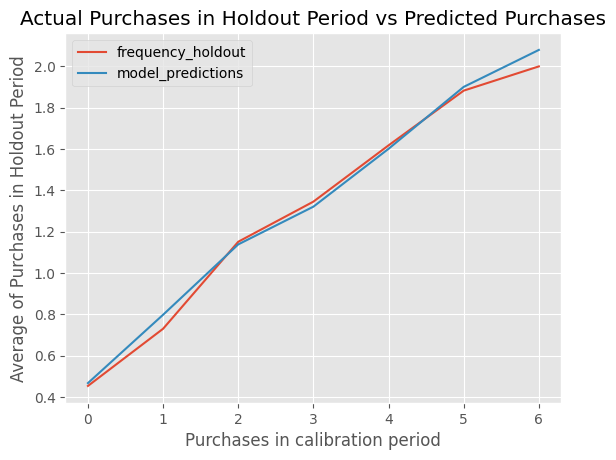

In [238]:
plot_calibration_purchases_vs_holdout_purchases(pareto_model, pareto_summary_cal_holdout)

In [239]:
pareto_summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
Customer ID,,,,,
12346.0,7.0,400.0,541.0,0.0,184.0
12347.0,3.0,158.0,220.0,4.0,184.0
12348.0,3.0,190.0,254.0,1.0,184.0
12349.0,2.0,182.0,405.0,1.0,184.0
12350.0,0.0,0.0,126.0,0.0,184.0


In [240]:
pareto_result["actual30"] = pareto_result["frequency"]/pareto_result["recency"]*30

In [241]:
pareto_result["actual30"].fillna(0, inplace = True)

In [242]:
pareto_result["error"] = pareto_result["actual30"]-pareto_result["predicted_purchases"]

In [243]:
pareto_result.head()

,frequency,recency,T,monetary_value,p_not_alive,p_alive,predicted_purchases,actual30,error
Customer ID,,,,,,,,,
12346.0,7.0,400.0,725.0,11066.637143,0.467498,0.532502,0.154746,0.525000,0.370254
12347.0,7.0,402.0,404.0,717.398571,0.000468,0.999532,0.485886,0.522388,0.036502
12348.0,4.0,363.0,438.0,449.310000,0.025383,0.974617,0.270807,0.330579,0.059772
12349.0,3.0,571.0,589.0,1120.056667,0.003559,0.996441,0.168624,0.157618,-0.011006
12350.0,0.0,0.0,310.0,0.000000,0.168504,0.831496,0.048059,0.000000,-0.048059


In [244]:
def get_metrics(true, predicted, error):
    
    print("Mean Squared Error: %s"%(mean_squared_error(true, predicted)))
    print("Root Mean Squared Error: %s"%(sqrt(mean_squared_error(true, predicted))))
    print("R2 Score: %s"%(r2_score(true, predicted)))
    
    sns.scatterplot(x=true, y=predicted, size=error, color="darkolivegreen")
    plt.title("Actual Purchase v/s Predicted Purchase")
    plt.show()

Mean Squared Error: 2.218660750507329
Root Mean Squared Error: 1.4895169520711502
R2 Score: 0.0605184200853216


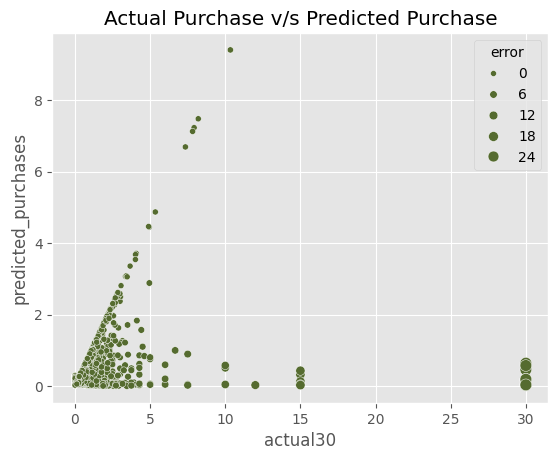

In [245]:
get_metrics(pareto_result["actual30"], pareto_result["predicted_purchases"], pareto_result["error"])

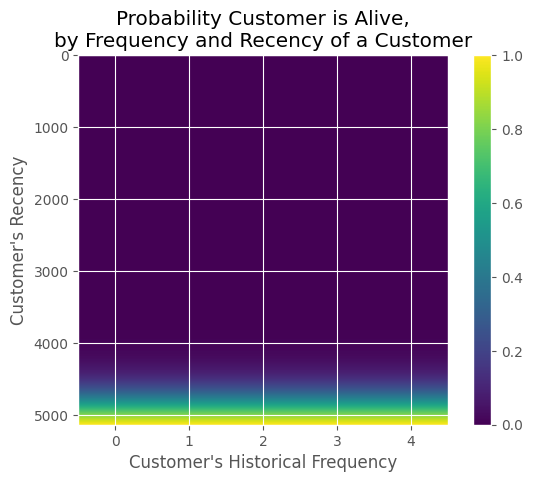

In [246]:
def plot_probability_alive(t_, data_, id_):
    individual_alive = data_[data_["Customer ID"] == id_]
    individual_alive["InvoiceDate"] = pd.to_datetime(individual_alive["InvoiceDate"])
    summary_data = summary_data_from_transaction_data(individual_alive, 'Customer ID', 'InvoiceDate', observation_period_end='2024-01-01')
    pareto_model = ParetoNBDFitter()
    pareto_model.fit(summary_data['frequency'], summary_data['recency'], summary_data['T'])
    plot_probability_alive_matrix(pareto_model)

plot_probability_alive(30, data, 12358.0)


## GAMMA-GAMMA MODEL

Trước khi tiếp tục với Mô hình Gamma Gamma của chúng ta, trước tiên ta phải lọc dữ liệu mà ta sẽ xóa, với các giá trị có frequency và monetary <= 0 .

In [247]:
idx = pareto_result[(pareto_result["frequency"] <= 0.0)]

In [248]:
idx = idx.index

In [249]:
ggf_filter = pareto_result.drop(idx, axis = 0)

In [250]:
m_idx = ggf_filter[(ggf_filter["monetary_value"] <= 0.0)].index

In [251]:
ggf_filter = ggf_filter.drop(m_idx, axis = 0)

<Axes: >

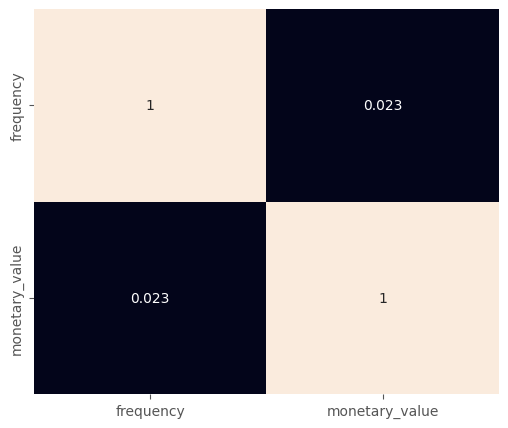

In [252]:
plt.figure(figsize=(6,5))
sns.heatmap(ggf_filter[["frequency", "monetary_value"]].corr(), annot = True, cbar = False)

In [253]:
ggf_model =  lifetimes.GammaGammaFitter(penalizer_coef=0.1)

In [254]:
ggf_model.fit(ggf_filter["frequency"], ggf_filter["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 4189 subjects, p: 1.02, q: 0.18, v: 0.93>

In [255]:
ggf_model.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,1.018050,0.024525,0.969981,1.066119
q,0.178324,0.002981,0.172481,0.184167
v,0.931554,0.025487,0.881600,0.981508


In [256]:
ggf_filter["expected_avg_sales_"] = ggf_model.conditional_expected_average_profit(ggf_filter["frequency"],
                                                                                     ggf_filter["monetary_value"])

In [257]:
ggf_filter.head()

,frequency,recency,T,monetary_value,p_not_alive,p_alive,predicted_purchases,actual30,error,expected_avg_sales_
Customer ID,,,,,,,,,,
12346.0,7.0,400.0,725.0,11066.637143,0.467498,0.532502,0.154746,0.525000,0.370254,12509.080892
12347.0,7.0,402.0,404.0,717.398571,0.000468,0.999532,0.485886,0.522388,0.036502,811.046157
12348.0,4.0,363.0,438.0,449.310000,0.025383,0.974617,0.270807,0.330579,0.059772,563.179509
12349.0,3.0,571.0,589.0,1120.056667,0.003559,0.996441,0.168624,0.157618,-0.011006,1532.725275
12352.0,8.0,356.0,392.0,338.261250,0.012395,0.987605,0.556117,0.674157,0.118040,376.346735


In [258]:
print("Mean Squared Error: %s" %(mean_squared_error(ggf_filter["monetary_value"], ggf_filter["expected_avg_sales_"])))
print("Root Mean Squared Error: %s" %(sqrt(mean_squared_error(ggf_filter["monetary_value"], ggf_filter["expected_avg_sales_"]))))
print("R2 Score: %s" %(r2_score(ggf_filter["monetary_value"], ggf_filter["expected_avg_sales_"])))

Mean Squared Error: 122007308.46619672
Root Mean Squared Error: 11045.69185095242
R2 Score: -16.21277621092266


In [259]:
ggf_filter["predicted_clv"] = ggf_model.customer_lifetime_value(pareto_model,
                                                       ggf_filter["frequency"],
                                                       ggf_filter["recency"],
                                                       ggf_filter["T"],
                                                       ggf_filter["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [260]:
ggf_filter.reset_index(inplace=True)
ggf_filter.head()

,Customer ID,frequency,recency,T,monetary_value,p_not_alive,p_alive,predicted_purchases,actual30,error,expected_avg_sales_,predicted_clv
0,12346.0,7.0,400.0,725.0,11066.637143,0.467498,0.532502,0.154746,0.525000,0.370254,12509.080892,35353.548156
1,12347.0,7.0,402.0,404.0,717.398571,0.000468,0.999532,0.485886,0.522388,0.036502,811.046157,8968.866526
2,12348.0,4.0,363.0,438.0,449.310000,0.025383,0.974617,0.270807,0.330579,0.059772,563.179509,3440.724745
3,12349.0,3.0,571.0,589.0,1120.056667,0.003559,0.996441,0.168624,0.157618,-0.011006,1532.725275,5941.147488
4,12352.0,8.0,356.0,392.0,338.261250,0.012395,0.987605,0.556117,0.674157,0.118040,376.346735,4734.002638


In [261]:
#Top 5 customers with high CLV

ggf_filter[["Customer ID", "predicted_clv"]].sort_values(by = "predicted_clv", ascending = False).head(5)

,Customer ID,predicted_clv
2904,16446.0,3.684477e+06
4074,18102.0,5.312386e+05
1638,14646.0,4.555095e+05
131,12536.0,3.670715e+05
3628,17450.0,2.913447e+05


In [262]:
ggf_filter.reset_index().drop("index", axis = 1, inplace = True)

In [263]:
#exporting the result to csv
ggf_filter.to_csv("customer_lifetime_value_prediction.csv")

## CUSTOMER SEGMENTATION USING PREDICTED CLV

Chúng ta đã tính toán CLV và phân phối CLV tương tự cho nhóm tiếp thị nhưng hiện tại nhóm tiếp thị muốn biết phân khúc khách hàng có lợi nhất mà họ có thể nhắm mục tiêu để cung cấp các chiến dịch được tối ưu hóa tốt nhất.

Công việc của chúng tôi là cung cấp dữ liệu được yêu cầu cho nhóm tiếp thị và để thực hiện điều tương tự, chúng ta sẽ thực hiện phân cụm theo các số liệu dự đoán.

In [264]:
ggf_filter.head()

,Customer ID,frequency,recency,T,monetary_value,p_not_alive,p_alive,predicted_purchases,actual30,error,expected_avg_sales_,predicted_clv
0,12346.0,7.0,400.0,725.0,11066.637143,0.467498,0.532502,0.154746,0.525000,0.370254,12509.080892,35353.548156
1,12347.0,7.0,402.0,404.0,717.398571,0.000468,0.999532,0.485886,0.522388,0.036502,811.046157,8968.866526
2,12348.0,4.0,363.0,438.0,449.310000,0.025383,0.974617,0.270807,0.330579,0.059772,563.179509,3440.724745
3,12349.0,3.0,571.0,589.0,1120.056667,0.003559,0.996441,0.168624,0.157618,-0.011006,1532.725275,5941.147488
4,12352.0,8.0,356.0,392.0,338.261250,0.012395,0.987605,0.556117,0.674157,0.118040,376.346735,4734.002638


In [265]:
col = ["predicted_purchases", "expected_avg_sales_", "predicted_clv"]

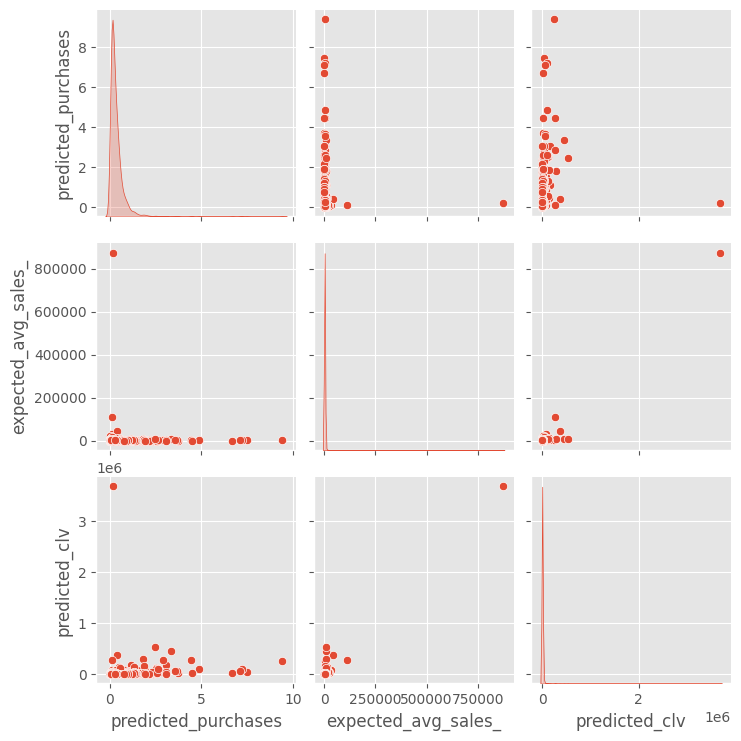

In [266]:
sns.pairplot(ggf_filter[col], diag_kind = "kde")

In [267]:
new_df = ggf_filter[col]

In [268]:

inertia = []

for i in range(2, 11):
    cluster = KMeans(n_clusters = i, init = "k-means++").fit(new_df)
    inertia.append(cluster.inertia_)

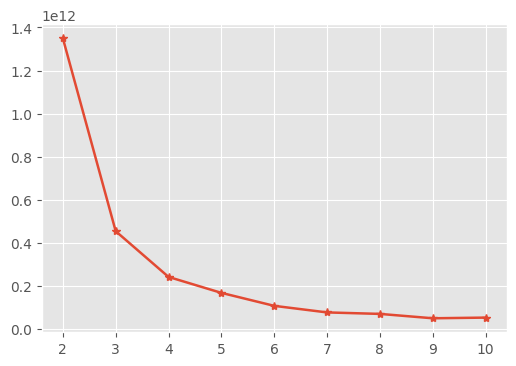

In [269]:
plt.figure(figsize=(6,4))
plt.plot(range(2,11), inertia, marker = "*", linewidth = 1.8)

#### Kết luận:
- Số lượng cụm tối ưu có thể 3-4 cụm.

In [270]:
k_model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 1000)

In [271]:
k_model_fit = k_model.fit(new_df)

In [272]:
new_df

,predicted_purchases,expected_avg_sales_,predicted_clv
0,0.154746,12509.080892,35353.548156
1,0.485886,811.046157,8968.866526
2,0.270807,563.179509,3440.724745
3,0.168624,1532.725275,5941.147488
4,0.556117,376.346735,4734.002638
...,...,...,...
4184,0.076241,423.819543,725.937605
4185,0.261441,408.370513,2379.984088
4186,0.767718,153.332639,2715.370526
4187,0.052169,4325.788385,4747.072119


In [273]:
centers = k_model_fit.cluster_centers_

In [274]:
centers

array([[3.23857478e-01, 7.79462657e+02, 4.20308087e+03],
       [1.87482943e-01, 8.73391392e+05, 3.68447652e+06],
       [3.10710758e+00, 2.31452258e+04, 3.39257914e+05],
       [2.03880518e+00, 4.16687631e+03, 8.02758633e+04]])

In [275]:
labels = k_model_fit.labels_

In [276]:
labels = pd.Series(labels, name = "Labels")

In [277]:
ggf_filter = pd.concat([ggf_filter, labels], axis = 1)

In [278]:
label_mapper = dict({0 : "Low", 3: "Medium", 1: "High", 2: "V_High"})

In [279]:
ggf_filter["Labels"] = ggf_filter["Labels"].map(label_mapper)

In [280]:
ggf_filter.groupby("Labels").mean().T

Labels,High,Low,Medium,V_High
Customer ID,1.644600e+04,15307.756939,14867.486486,15205.750000
frequency,1.000000e+00,5.983104,50.324324,72.250000
recency,2.050000e+02,382.271784,526.243243,447.500000
T,2.050000e+02,522.138306,536.000000,485.125000
monetary_value,1.684696e+05,380.195690,1949.839212,7452.937648
p_not_alive,0.000000e+00,0.109010,0.004628,0.022052
p_alive,1.000000e+00,0.890990,0.995372,0.977948
predicted_purchases,1.874829e-01,0.323857,2.038805,3.107108
actual30,1.463415e-01,0.672043,3.172439,3.856831
error,-4.114148e-02,0.348185,1.133634,0.749723


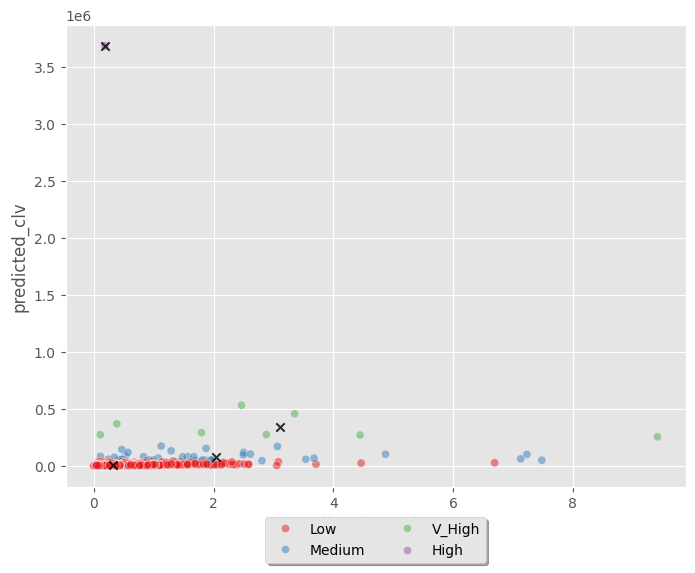

In [281]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = "predicted_purchases", y = "predicted_clv", hue = "Labels", palette = "Set1", data = ggf_filter, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 2], marker = "x", color = "k", alpha = 0.8)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

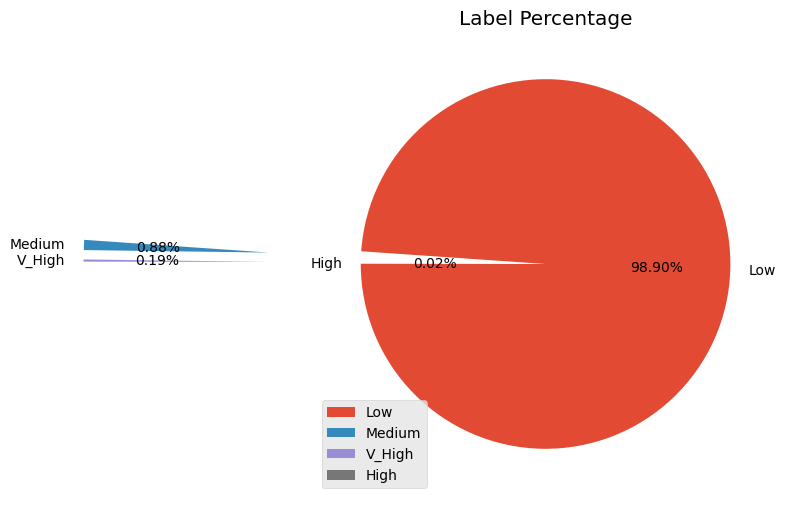

In [282]:
plt.figure(figsize=(8,6))
plt.pie(ggf_filter["Labels"].value_counts(), labels = ggf_filter["Labels"].unique(), startangle = 180, explode = [0.0,1.5,1.5,0.0], autopct = "%1.2f%%")
plt.title("Label Percentage")
plt.legend()

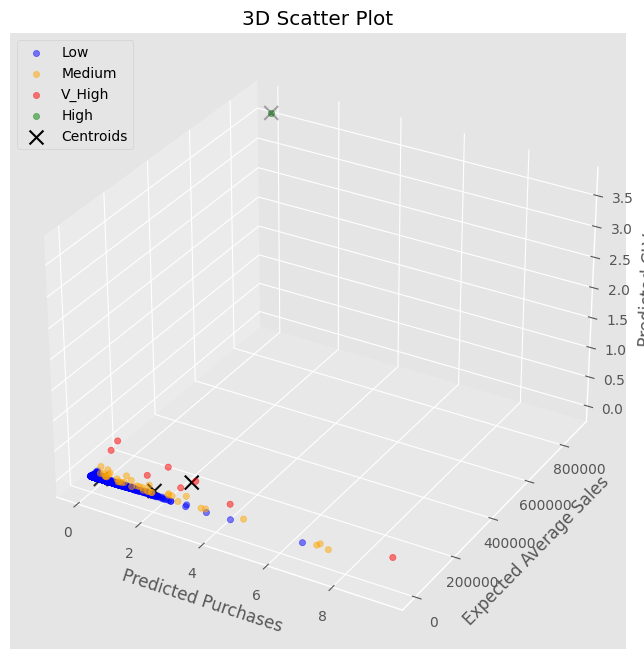

In [283]:
# Vẽ biểu đồ 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dữ liệu
x = ggf_filter["predicted_purchases"]
y = ggf_filter["expected_avg_sales_"]
z = ggf_filter["predicted_clv"]
labels = ggf_filter["Labels"]

# Màu sắc cho từng nhóm
colors = {'Low': 'blue', 'Medium': 'orange', 'High': 'green', 'V_High': 'red'}

# Vẽ điểm
for label in labels.unique():
    ax.scatter(x[labels == label], y[labels == label], z[labels == label], c=colors[label], label=label, alpha=0.5)

# Vẽ các centroid
centers_x = centers[:, 0]
centers_y = centers[:, 1]
centers_z = centers[:, 2]
ax.scatter(centers_x, centers_y, centers_z, marker='x', color='black', s=100, label='Centroids')

# Đặt tên cho trục
ax.set_xlabel('Predicted Purchases')
ax.set_ylabel('Expected Average Sales')
ax.set_zlabel('Predicted CLV')

# Thêm chú thích
plt.legend(loc='upper left')
plt.title('3D Scatter Plot')

# Hiển thị biểu đồ
plt.show()

In [294]:


# Dữ liệu và màu sắc cho từng nhóm
x = ggf_filter["predicted_purchases"]
y = ggf_filter["expected_avg_sales_"]
z = ggf_filter["predicted_clv"]
labels = ggf_filter["Labels"]
colors = {'Low': 'blue', 'Medium': 'orange', 'High': 'green', 'V_High': 'red'}

# Tạo biểu đồ 3D
fig = go.Figure()

# Thêm các điểm dữ liệu vào biểu đồ
for label in labels.unique():
    fig.add_trace(go.Scatter3d(
        x=x[labels == label],
        y=y[labels == label],
        z=z[labels == label],
        mode='markers',
        marker=dict(color=colors[label]),
        name=label
    ))

# Thêm các centroid
fig.add_trace(go.Scatter3d(
    x=centers_x,
    y=centers_y,
    z=centers_z,
    mode='markers',
    marker=dict(color='black', size=10, symbol='x'),
    name='Centroids'
))

# Cài đặt layout cho biểu đồ
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Predicted Purchases'),
        yaxis=dict(title='Expected Average Sales'),
        zaxis=dict(title='Predicted CLV')
    ),
    title='3D Scatter Plot',
    width=1200,
    height=900
)

# Hiển thị biểu đồ
fig.show()


In [285]:
ggf_filter.to_csv("customer_segmentation_result.csv")

# Association Rules

In [286]:
data_ar = data_copy.copy()
data_ar.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Amount,Year,Month,Day,Hour
0,489434,4009,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,1,7
1,489434,3326,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,7
2,489434,3328,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,7
3,489434,1253,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12,1,7
4,489434,618,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12,1,7


In [287]:
# Loại bỏ các hàng có giá trị null ở cột 'Description' và 'Customer ID'
data_ar.dropna(subset=["Description", "Customer ID"], inplace=True)

# Chỉ giữ lại các hàng có Quantity và Price lớn hơn 0
data_ar = data_ar[(data_ar['Quantity'] > 0) & (data_ar['Price'] > 0)]

# Tạo cột 'TotalAmount' là tổng tiền cho mỗi dòng
data_ar['TotalAmount'] = data_ar['Quantity'] * data_ar['Price']

In [288]:
# Hiển thị các giá trị độc nhất của cột 'Invoice'
print(f"Số lượng hóa đơn độc nhất: {data_ar['Invoice'].nunique()}")
print(f"Số lượng khách hàng độc nhất: {data_ar['Customer ID'].nunique()}")
print(f"Số lượng sản phẩm độc nhất: {data_ar['Description'].nunique()}")

Số lượng hóa đơn độc nhất: 36969
Số lượng khách hàng độc nhất: 5878
Số lượng sản phẩm độc nhất: 5283


In [289]:
# Tạo ma trận giao dịch
basket = data_ar.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice')

# Chuyển đổi giá trị số lượng thành giá trị nhị phân (boolean)
basket_sets = basket.applymap(lambda x: x >= 1)

# Kiểm tra kiểu dữ liệu của DataFrame
print(basket_sets.dtypes)


Description
  DOORMAT UNION JACK GUNS AND ROSES    bool
 3 STRIPEY MICE FELTCRAFT              bool
 4 PURPLE FLOCK DINNER CANDLES         bool
 50'S CHRISTMAS GIFT BAG LARGE         bool
 ANIMAL STICKERS                       bool
                                       ... 
ZINC T-LIGHT HOLDER STARS SMALL        bool
ZINC TOP  2 DOOR WOODEN SHELF          bool
ZINC WILLIE WINKIE  CANDLE STICK       bool
ZINC WIRE KITCHEN ORGANISER            bool
ZINC WIRE SWEETHEART LETTER TRAY       bool
Length: 5283, dtype: object


In [290]:


# Áp dụng thuật toán Apriori để tìm các tập mục phổ biến với ngưỡng hỗ trợ tối thiểu là 0.01
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

print(frequent_itemsets.head())


    support                               itemsets
0  0.012767               (10 COLOUR SPACEBOY PEN)
1  0.013904        (12 PENCIL SMALL TUBE WOODLAND)
2  0.012416  (12 PENCILS SMALL TUBE RED RETROSPOT)
3  0.018502          (12 PENCILS SMALL TUBE SKULL)
4  0.013173          (12 PENCILS TALL TUBE SKULLS)


In [291]:
# Trích xuất các luật kết hợp với ngưỡng độ tin cậy tối thiểu là 0.3
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Hiển thị các luật kết hợp
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
0,(72 SWEETHEART FAIRY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.015445,0.485544,10.170019
1,(60 TEATIME FAIRY CAKE CASES),(72 SWEETHEART FAIRY CAKE CASES),0.015445,0.323513,10.170019
2,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 DINOSAUR CAKE CASES),0.015581,0.326346,10.648430
3,(PACK OF 60 DINOSAUR CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.015581,0.508385,10.648430
4,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.019909,0.416997,9.769308
...,...,...,...,...,...
269,"(LUNCH BAG WOODLAND, LUNCH BAG CARS BLUE)",(LUNCH BAG SPACEBOY DESIGN ),0.010360,0.554269,10.934246
270,"(LUNCH BAG SPACEBOY DESIGN , LUNCH BAG CARS BLUE)",(LUNCH BAG WOODLAND),0.010360,0.549498,12.816647
271,"(WHITE HANGING HEART T-LIGHT HOLDER, WOODEN FR...",(WOODEN PICTURE FRAME WHITE FINISH),0.011658,0.643284,14.343517
272,"(WHITE HANGING HEART T-LIGHT HOLDER, WOODEN PI...",(WOODEN FRAME ANTIQUE WHITE ),0.011658,0.649096,13.534374


In [292]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(72 SWEETHEART FAIRY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.031810,0.047743,0.015445,0.485544,10.170019,0.013927,1.850999,0.931297
1,(60 TEATIME FAIRY CAKE CASES),(72 SWEETHEART FAIRY CAKE CASES),0.047743,0.031810,0.015445,0.323513,10.170019,0.013927,1.431201,0.946878
2,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 DINOSAUR CAKE CASES),0.047743,0.030647,0.015581,0.326346,10.648430,0.014117,1.438947,0.951517
3,(PACK OF 60 DINOSAUR CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.030647,0.047743,0.015581,0.508385,10.648430,0.014117,1.936997,0.934737
4,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.047743,0.042684,0.019909,0.416997,9.769308,0.017871,1.642043,0.942643
...,...,...,...,...,...,...,...,...,...,...
269,"(LUNCH BAG WOODLAND, LUNCH BAG CARS BLUE)",(LUNCH BAG SPACEBOY DESIGN ),0.018691,0.050691,0.010360,0.554269,10.934246,0.009413,2.129781,0.925850
270,"(LUNCH BAG SPACEBOY DESIGN , LUNCH BAG CARS BLUE)",(LUNCH BAG WOODLAND),0.018854,0.042874,0.010360,0.549498,12.816647,0.009552,2.124576,0.939693
271,"(WHITE HANGING HEART T-LIGHT HOLDER, WOODEN FR...",(WOODEN PICTURE FRAME WHITE FINISH),0.018123,0.044848,0.011658,0.643284,14.343517,0.010846,2.677622,0.947453
272,"(WHITE HANGING HEART T-LIGHT HOLDER, WOODEN PI...",(WOODEN FRAME ANTIQUE WHITE ),0.017961,0.047959,0.011658,0.649096,13.534374,0.010797,2.713112,0.943052


In [293]:
rules.to_csv("association_rules.csv")